In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv('../../data/transformed/data4visualize.csv')
df.head()

team                  opponent  venue        date  time  round  day  \
0  Liverpool                 Brentford      1  2024-08-25    16      2    6   
1  Liverpool         Nottingham Forest      1  2024-09-14    15      4    5   
2  Liverpool               Bournemouth      1  2024-09-21    15      5    5   
3  Liverpool                   Chelsea      1  2024-10-20    16      8    6   
4  Liverpool  Brighton and Hove Albion      1  2024-11-02    15     10    5   

   result   gf   ga  ...  aerial duels won  aerial duels lost     season  \
0       3  2.0  0.0  ...               6.0                8.0  2024-2025   
1       0  0.0  1.0  ...              21.0               12.0  2024-2025   
2       3  3.0  0.0  ...               9.0                6.0  2024-2025   
3       3  2.0  1.0  ...               6.0               10.0  2024-2025   
4       3  2.0  1.0  ...              10.0                8.0  2024-2025   

   b365h b365d b365a over2.5 under2.5  points  points_before_match  
0   1.27  5.75  11.0    1.36     3.20       6                    3  
1   1.22  6.50  12.0    1.44     2.75       9                    9  
2   1.30  6.25   9.0    1.36     3.20      12                    9  
3   1.62  4.10   5.0    1.40     3.00      21                   18  
4   1.40  5.00   7.5    1.40     3.00      25                   22  

[5 rows x 139 columns]

In [5]:
df['result'] = df['gf'] - df['ga']
df.head()

team                  opponent  venue        date  time  round  day  \
0  Liverpool                 Brentford      1  2024-08-25    16      2    6   
1  Liverpool         Nottingham Forest      1  2024-09-14    15      4    5   
2  Liverpool               Bournemouth      1  2024-09-21    15      5    5   
3  Liverpool                   Chelsea      1  2024-10-20    16      8    6   
4  Liverpool  Brighton and Hove Albion      1  2024-11-02    15     10    5   

   result   gf   ga  ...  aerial duels won  aerial duels lost     season  \
0     2.0  2.0  0.0  ...               6.0                8.0  2024-2025   
1    -1.0  0.0  1.0  ...              21.0               12.0  2024-2025   
2     3.0  3.0  0.0  ...               9.0                6.0  2024-2025   
3     1.0  2.0  1.0  ...               6.0               10.0  2024-2025   
4     1.0  2.0  1.0  ...              10.0                8.0  2024-2025   

   b365h b365d b365a over2.5 under2.5  points  points_before_match  
0   1.27  5.75  11.0    1.36     3.20       6                    3  
1   1.22  6.50  12.0    1.44     2.75       9                    9  
2   1.30  6.25   9.0    1.36     3.20      12                    9  
3   1.62  4.10   5.0    1.40     3.00      21                   18  
4   1.40  5.00   7.5    1.40     3.00      25                   22  

[5 rows x 139 columns]

C:\Users\admin\AppData\Local\Temp\ipykernel_24208\3674292457.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_corr_res.index, y=high_corr_res.values, palette='magma')


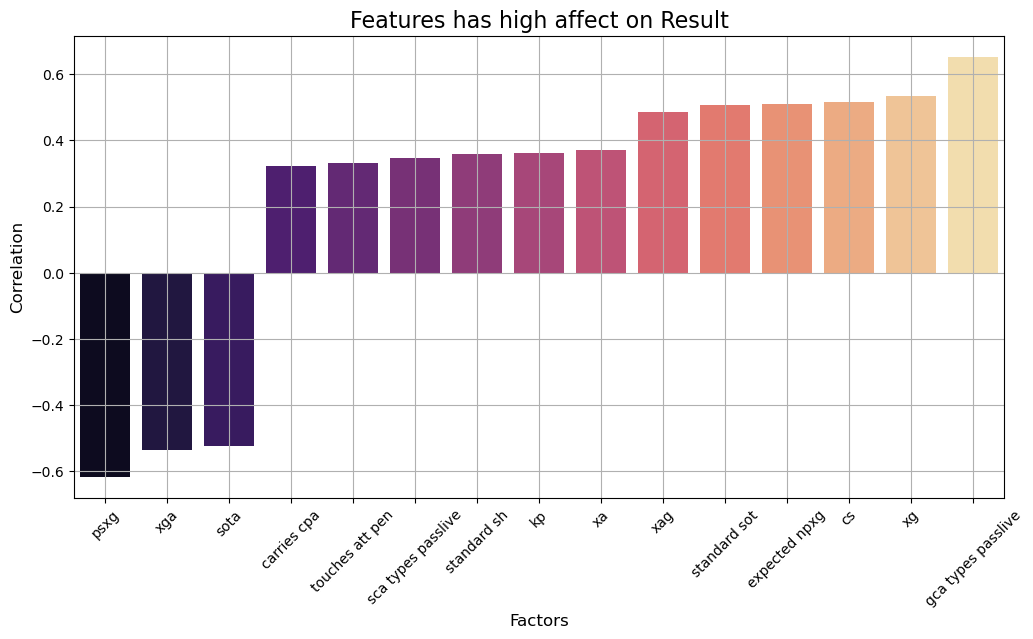

In [6]:
corr_res = df.select_dtypes(include=[np.number]).corr()['result'].drop(['result', 'gf', 'ga', 
            'standard gls', 'ast', 'expected xg']).sort_values(ascending=True)
high_corr_res = corr_res[abs(corr_res) > 0.3]

plt.figure(figsize=(12, 6))
sns.barplot(x=high_corr_res.index, y=high_corr_res.values, palette='magma')
plt.title('Features has high affect on Result', fontsize=16)
plt.xlabel('Factors', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_24208\293382204.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_res.index, y=corr_res.values, palette='magma')


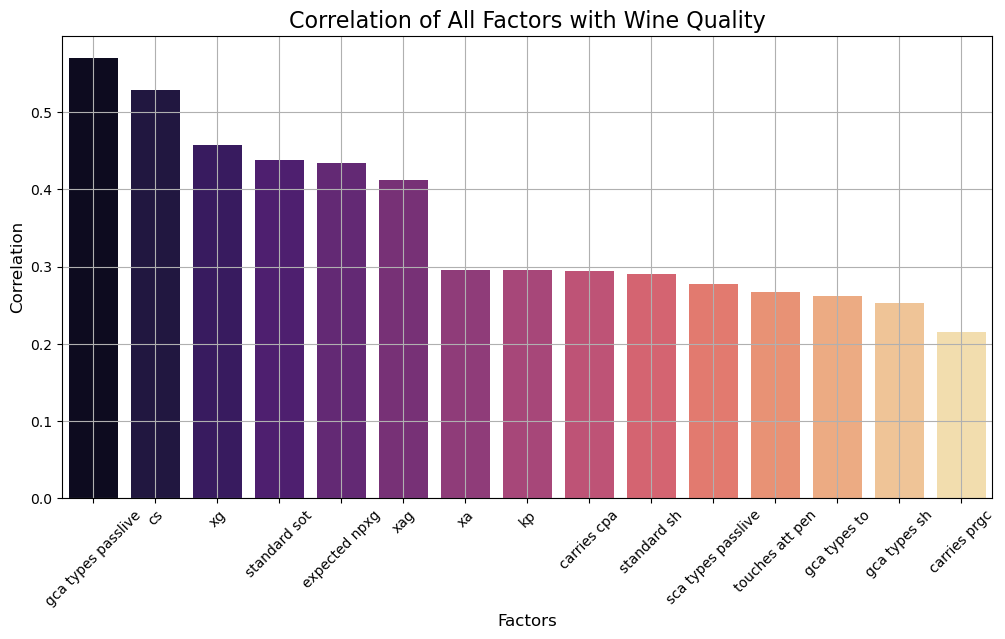

In [4]:
corr_res = df.select_dtypes(include=[np.number]).corr()['result'].drop(['result', 'gf', 'ga', 
'standard gls', 'ast', 'expected xg']).sort_values(ascending=False)[:15]

plt.figure(figsize=(12, 6))
sns.barplot(x=corr_res.index, y=corr_res.values, palette='magma')
plt.title('Correlation of All Factors with Wine Quality', fontsize=16)
plt.xlabel('Factors', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Distribution

In [46]:
plt.style.use('ggplot')

In [59]:
stat_cols = [col for col in df.select_dtypes('number').columns if col not in ['venue', 'time', 'day', 'result', 
                                                                               'points', 'points_before_match', 'round', 'season']]
len(stat_cols)

124

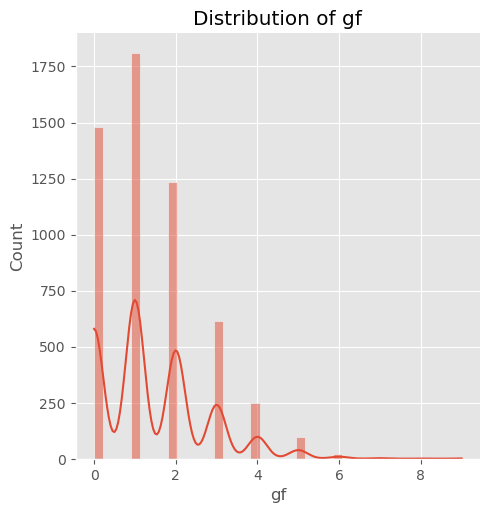

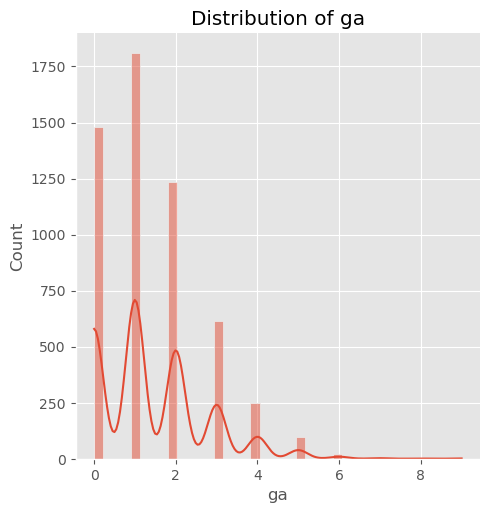

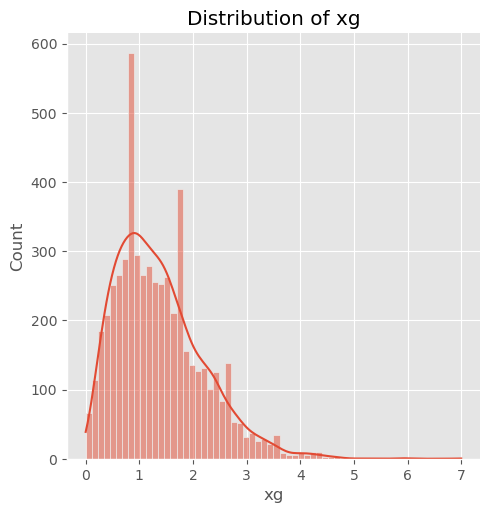

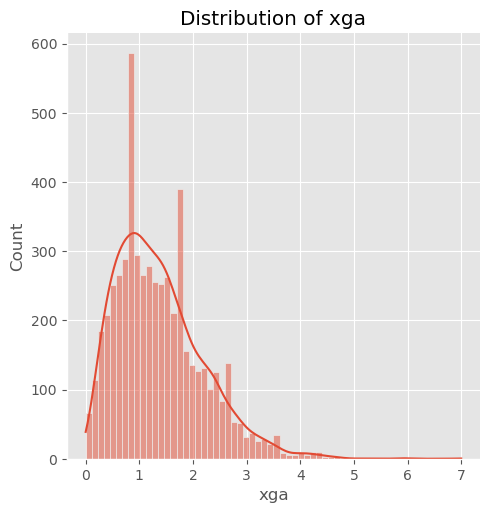

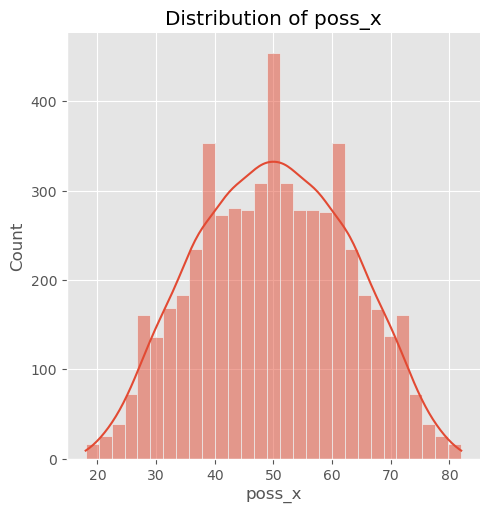

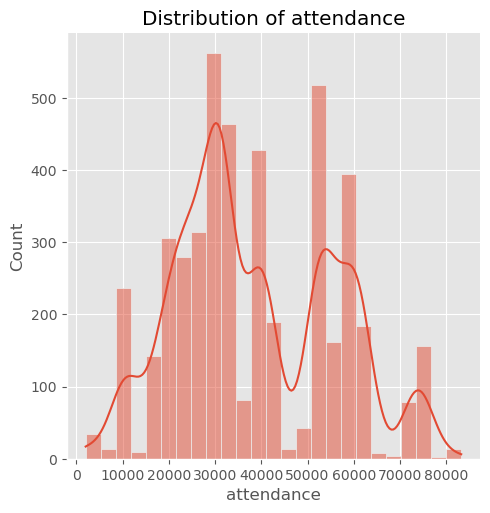

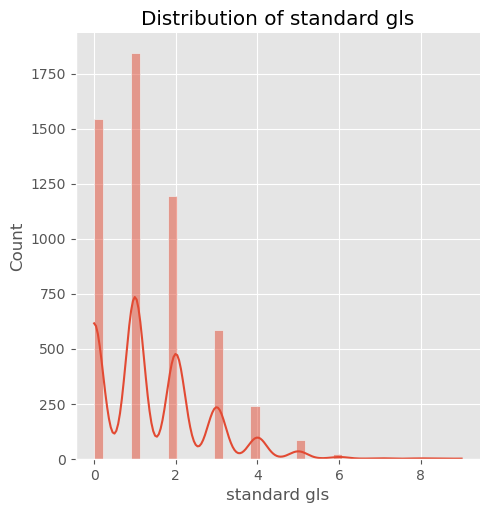

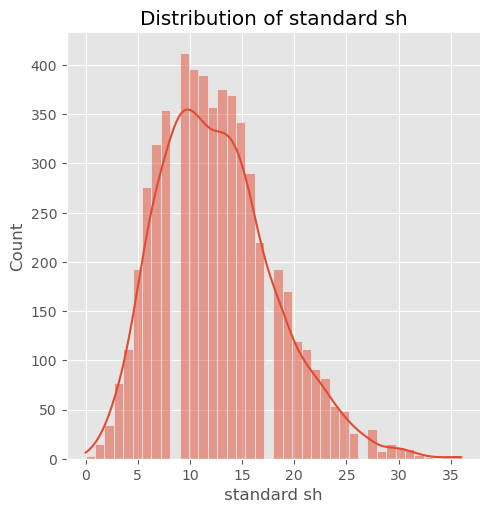

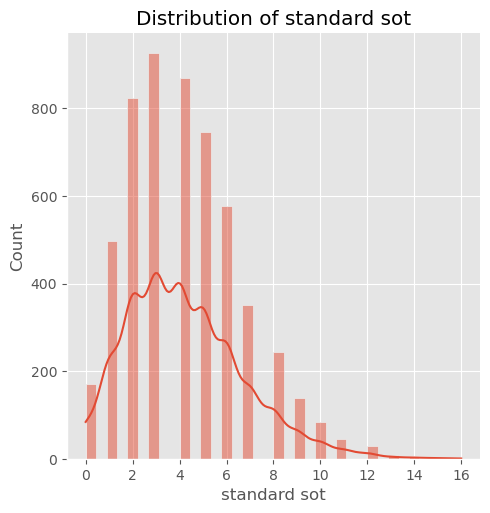

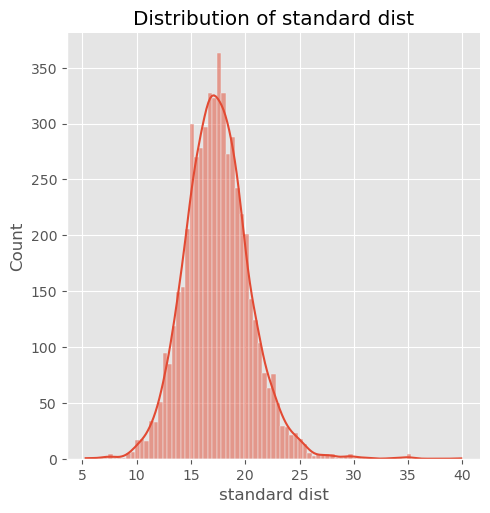

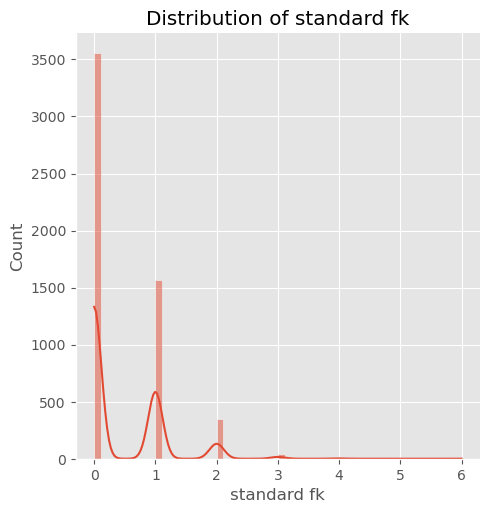

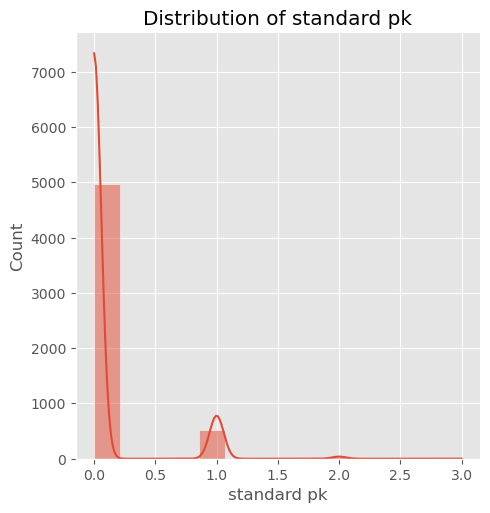

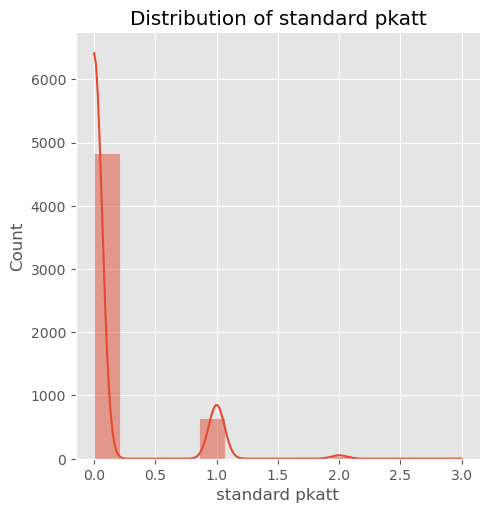

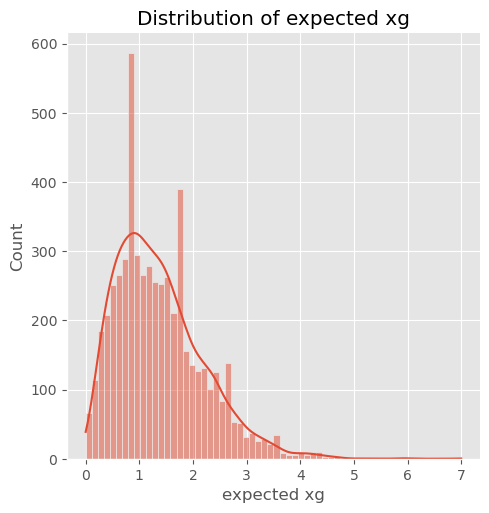

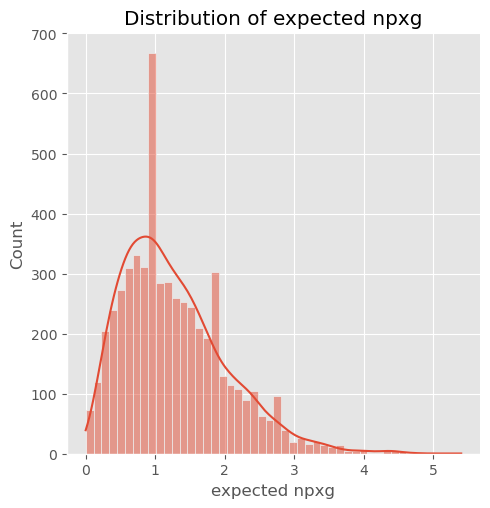

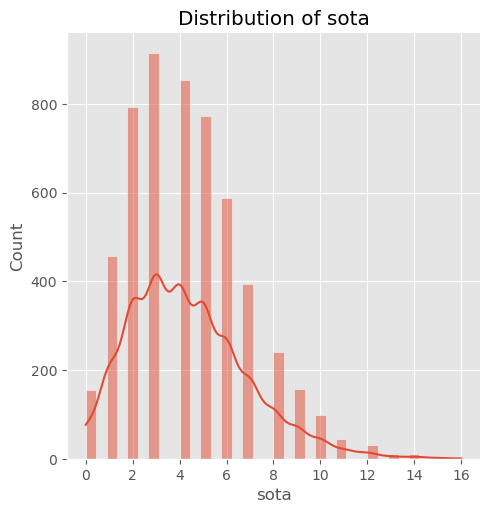

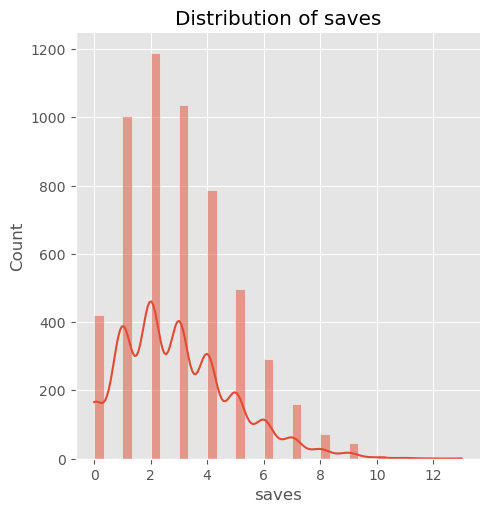

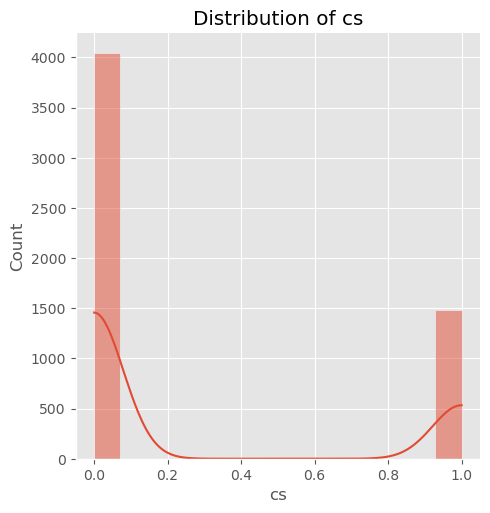

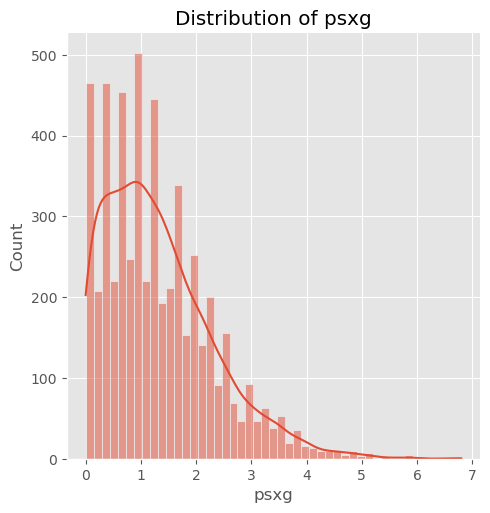

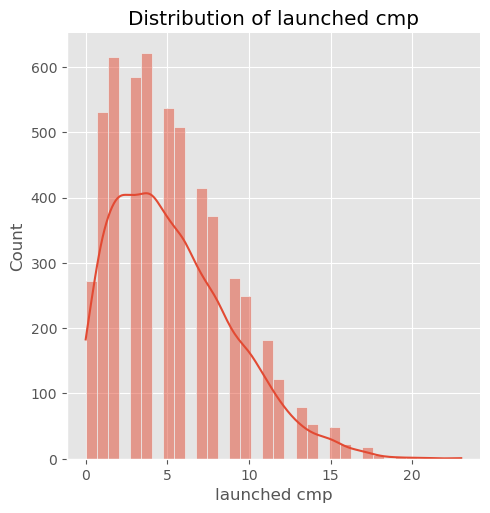

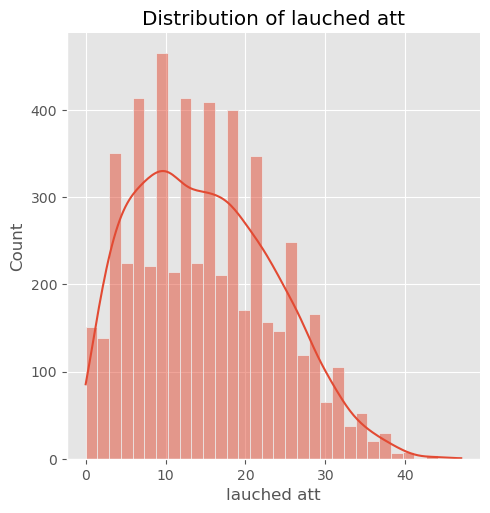

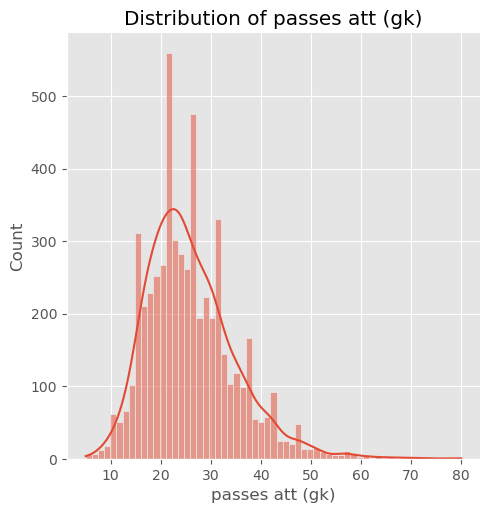

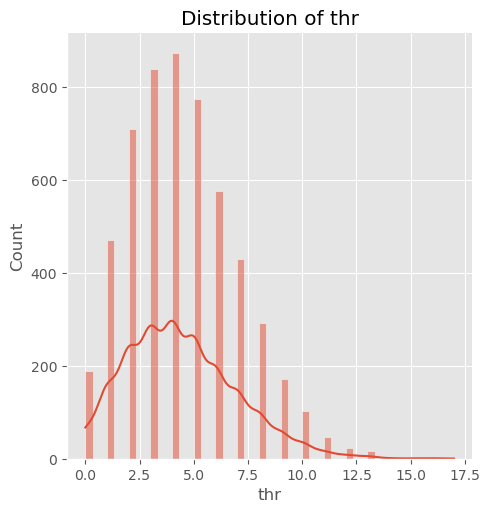

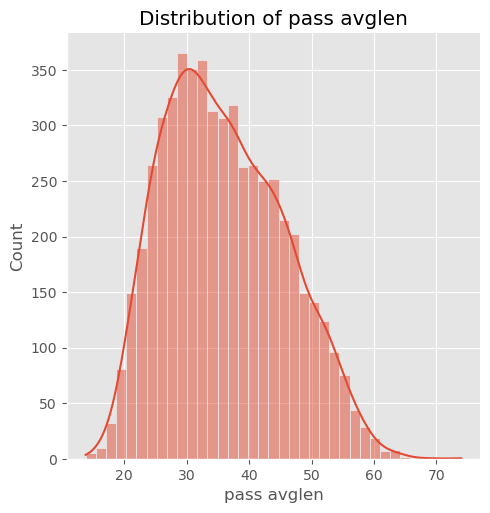

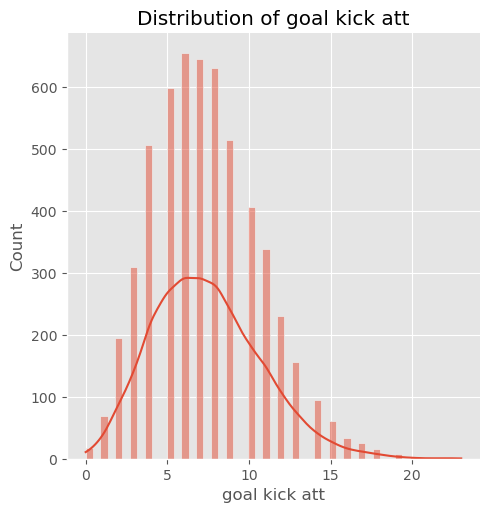

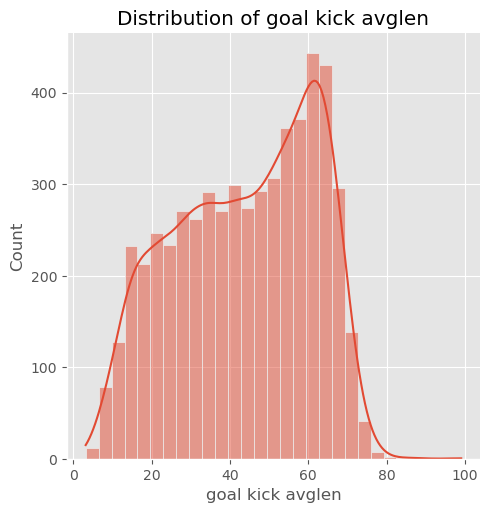

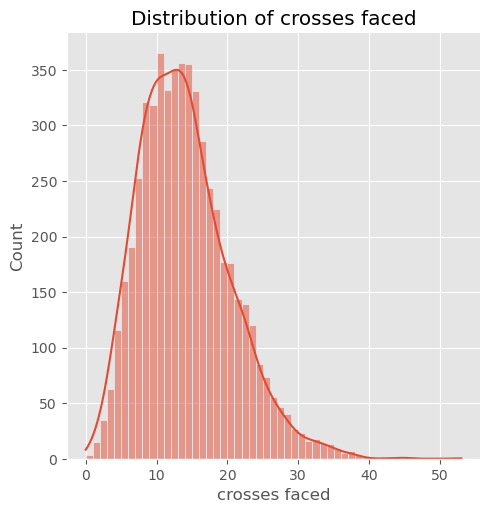

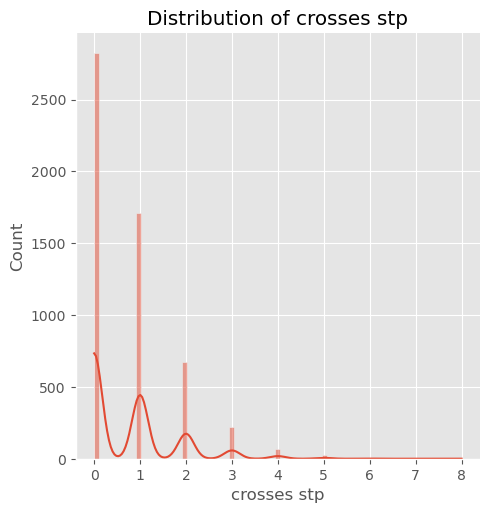

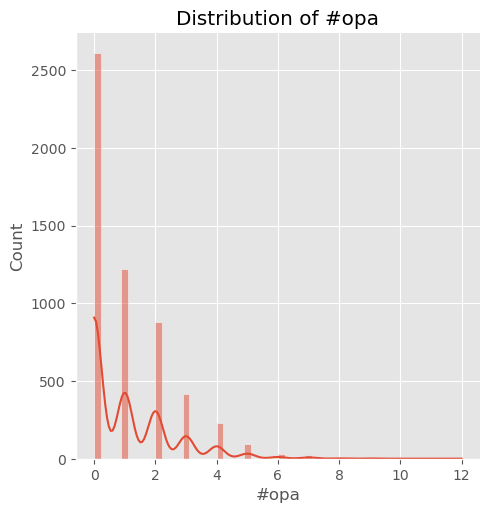

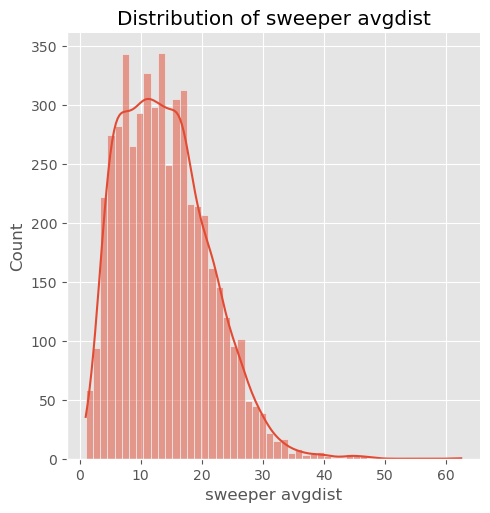

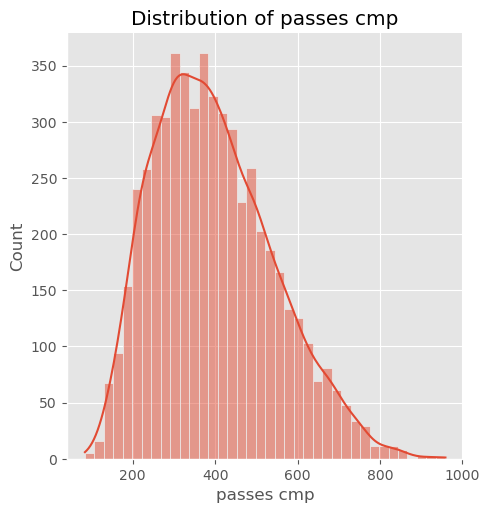

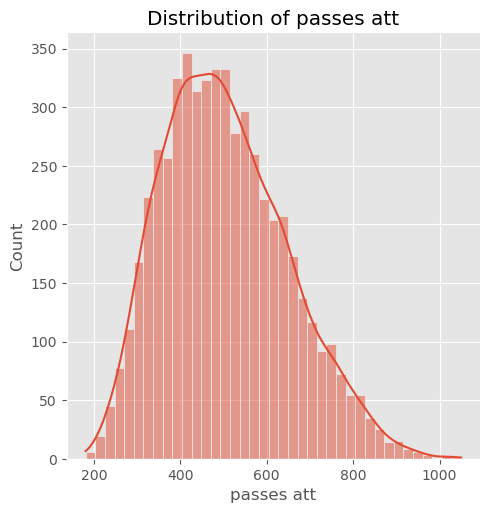

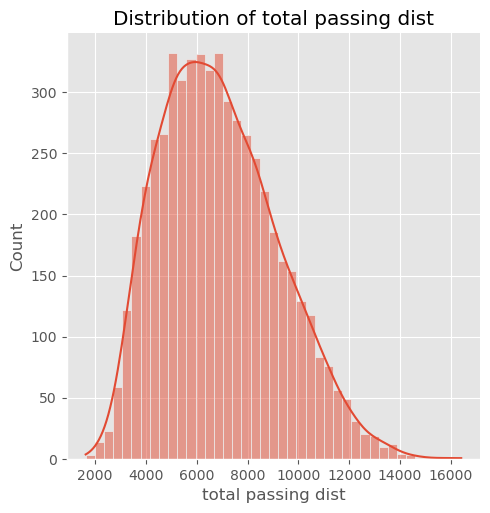

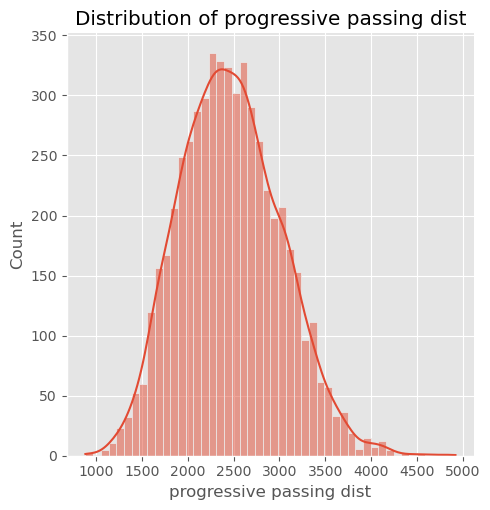

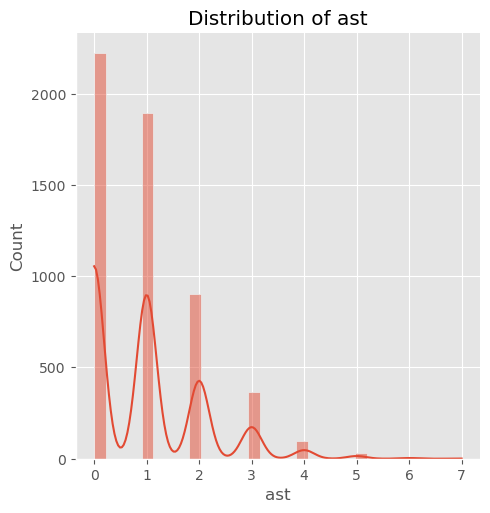

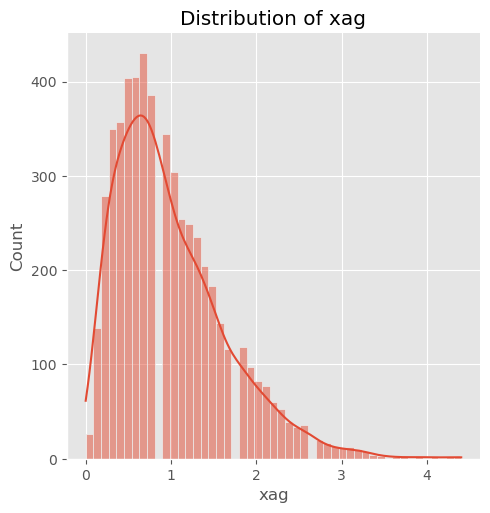

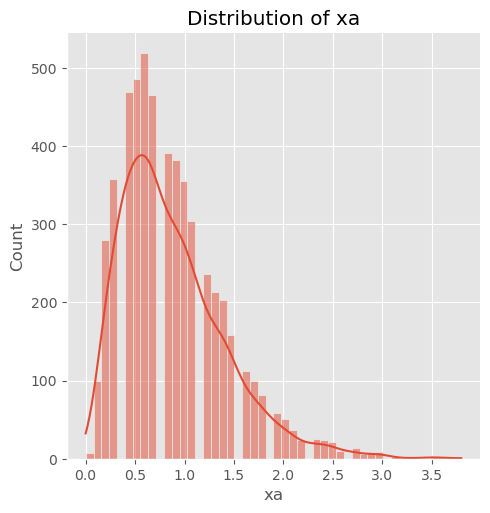

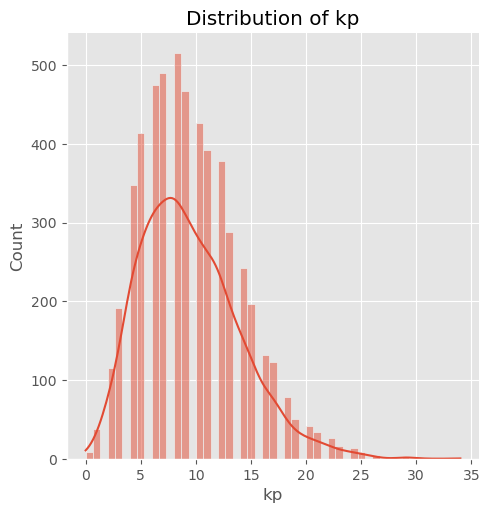

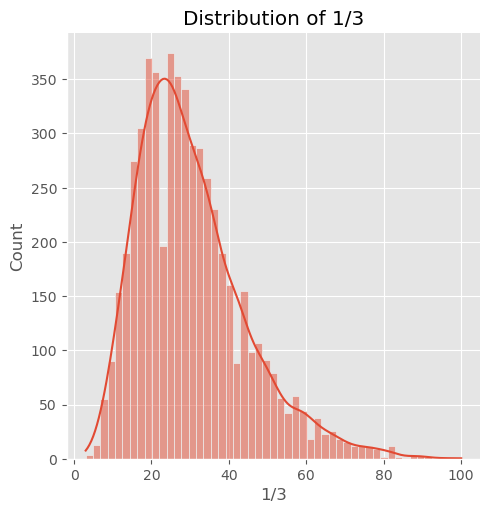

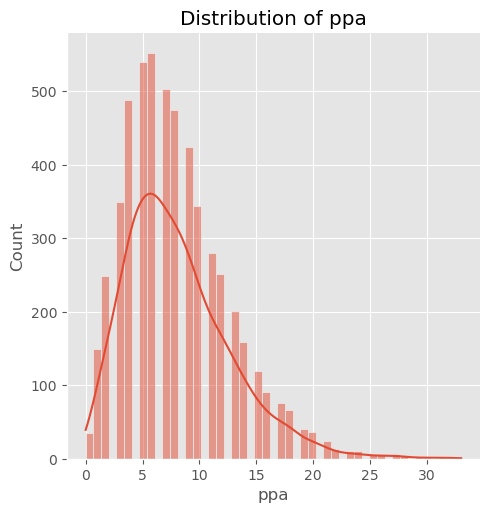

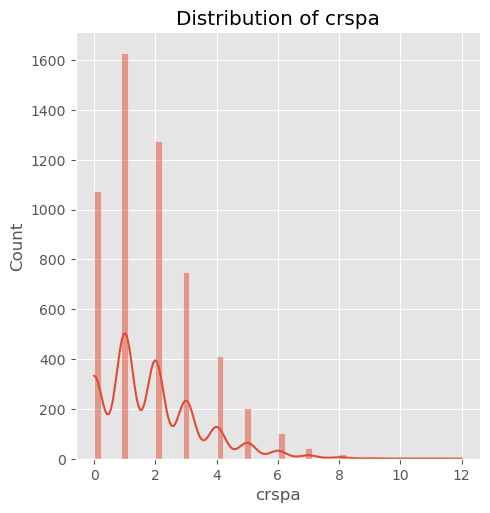

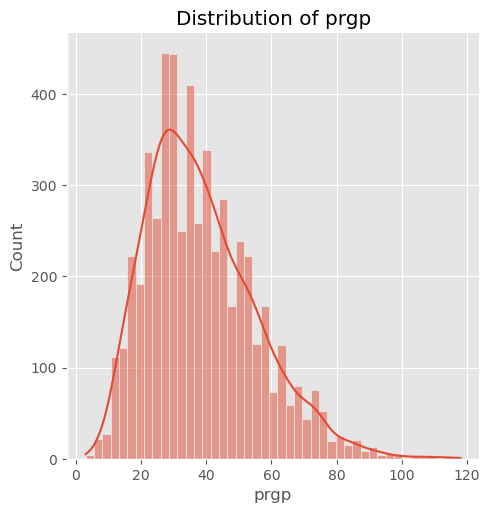

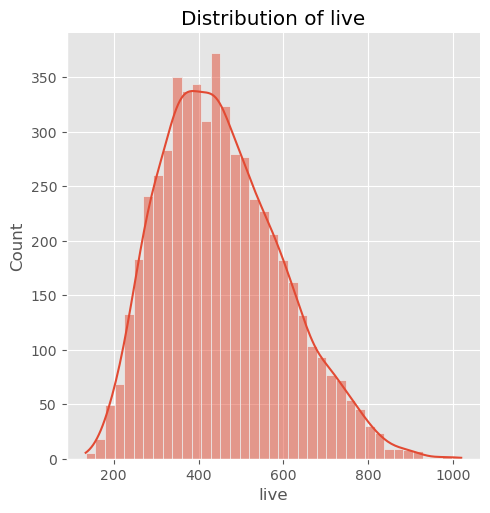

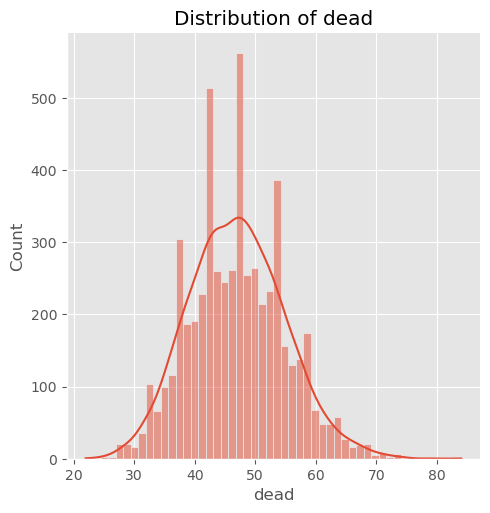

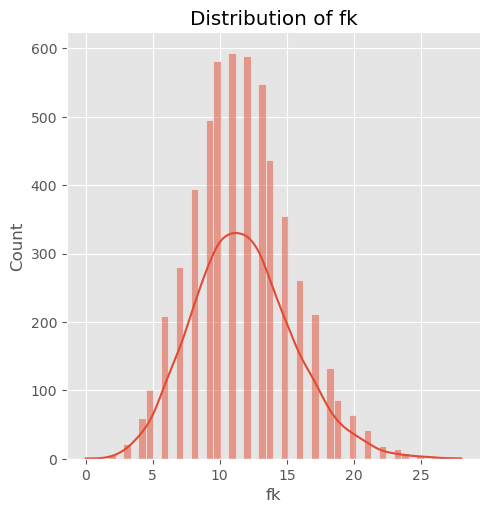

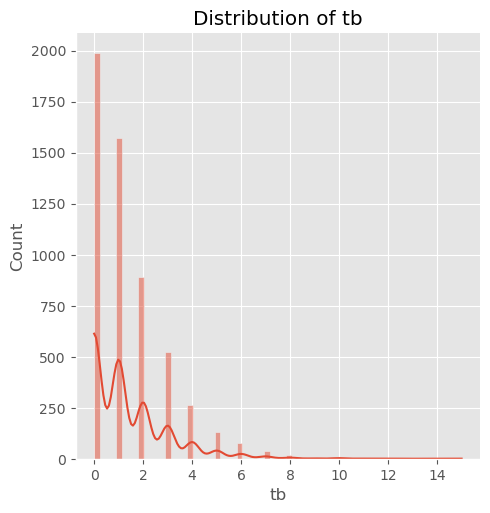

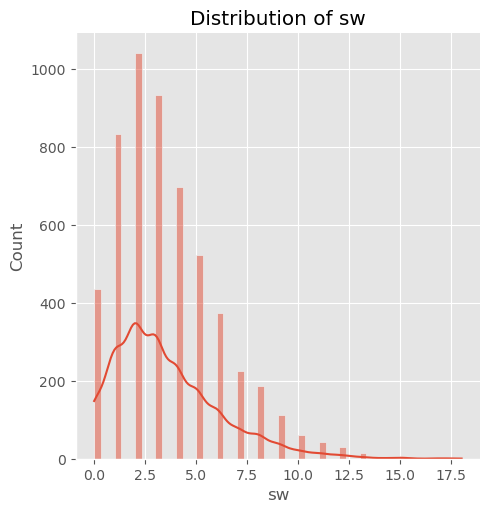

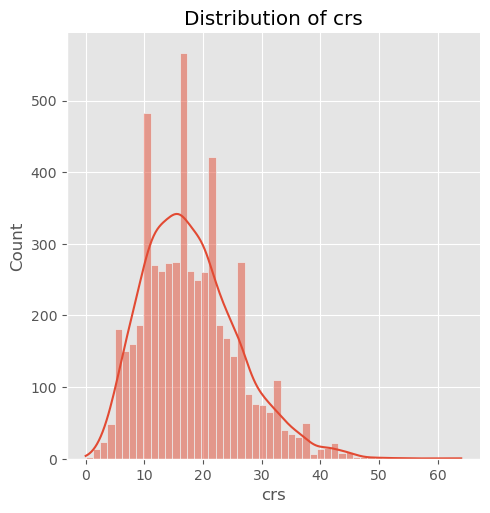

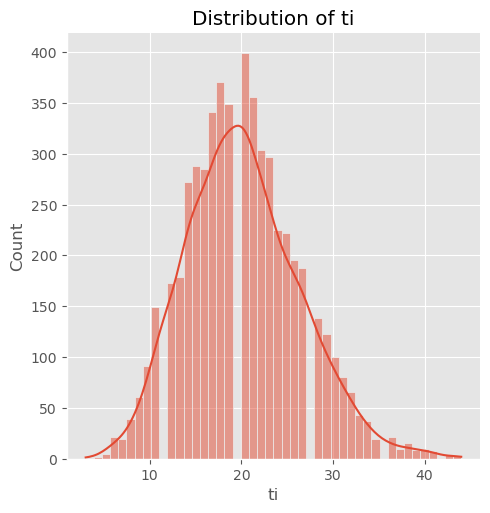

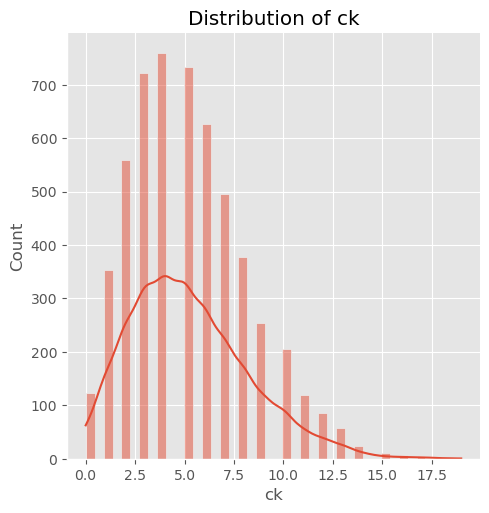

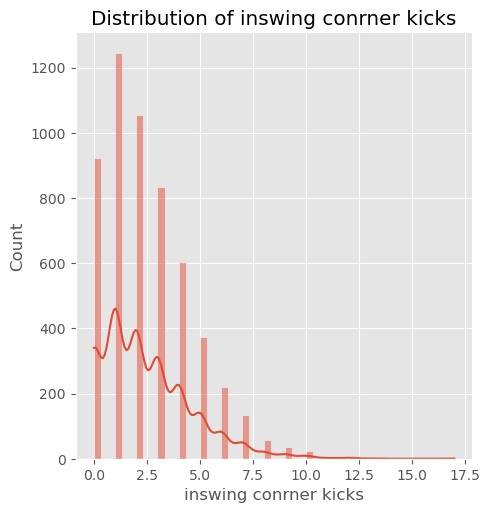

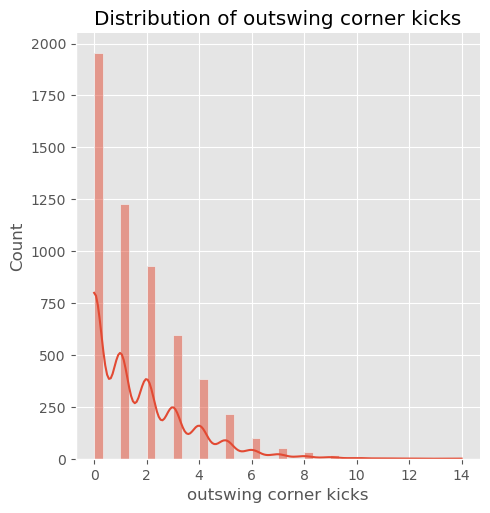

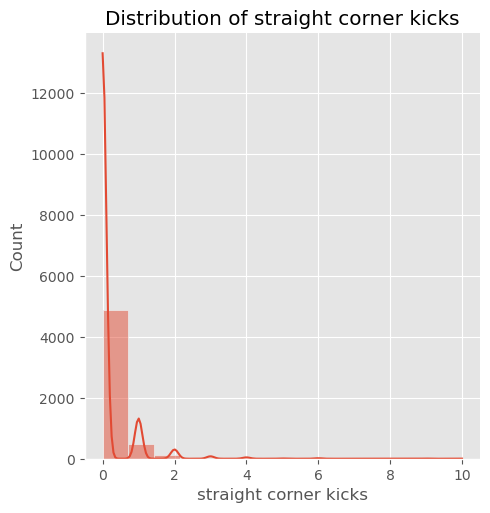

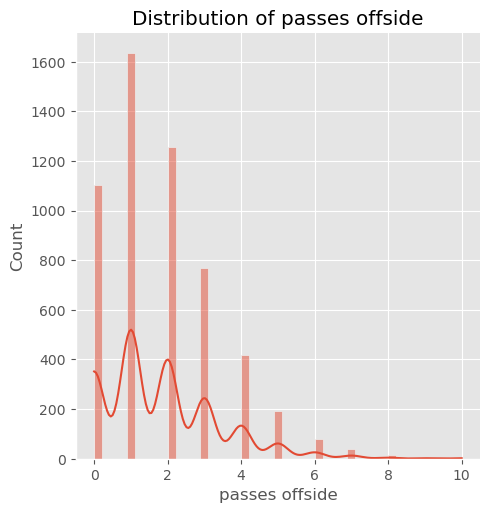

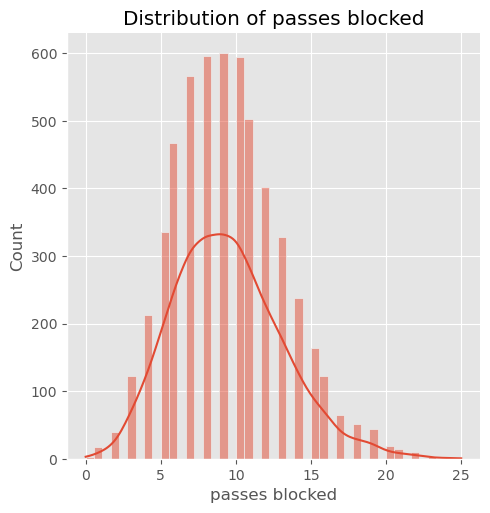

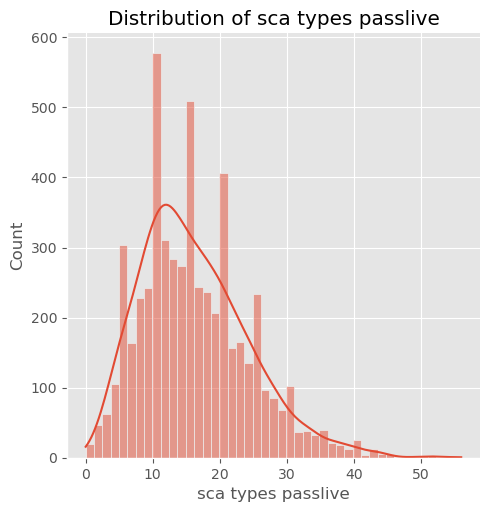

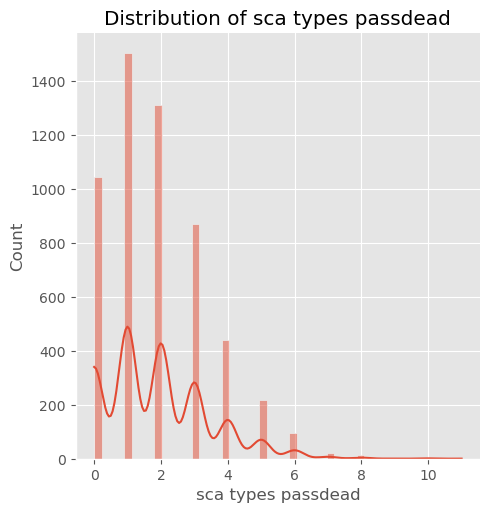

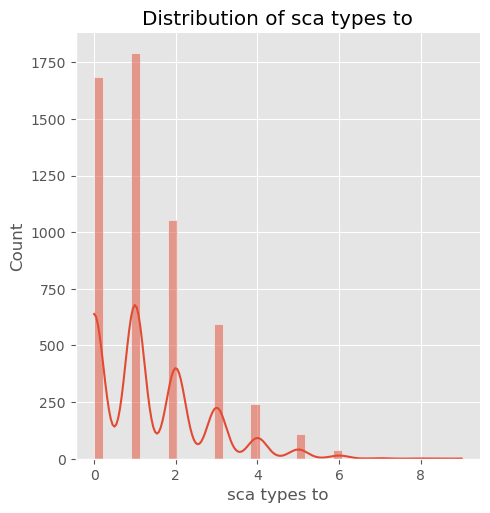

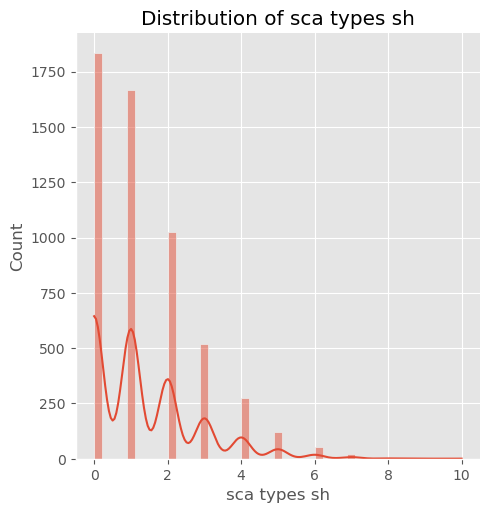

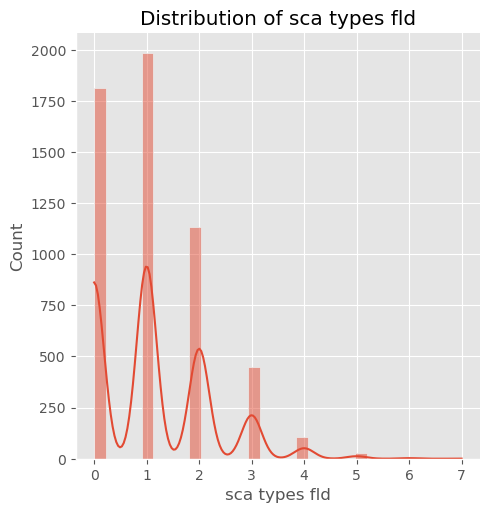

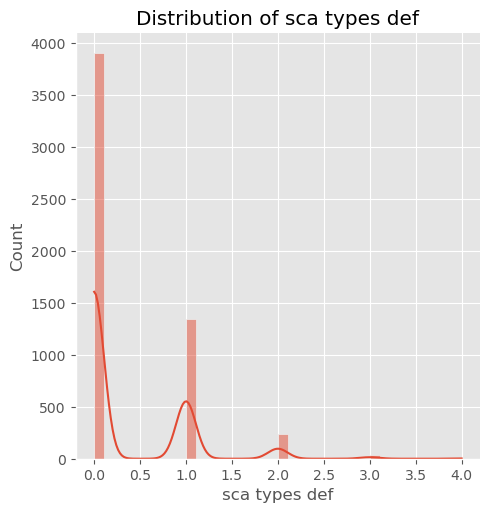

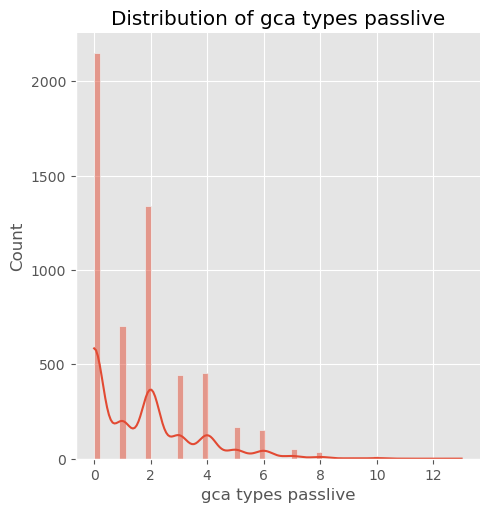

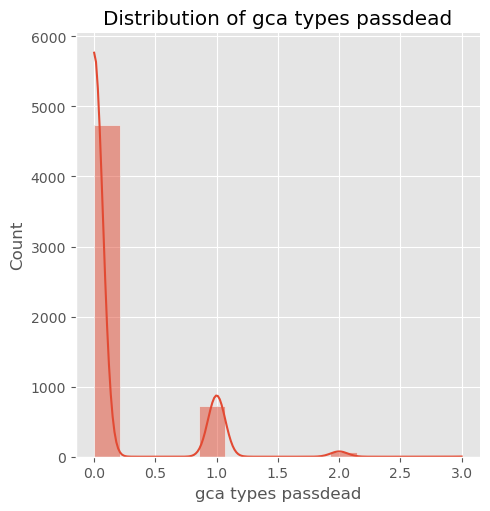

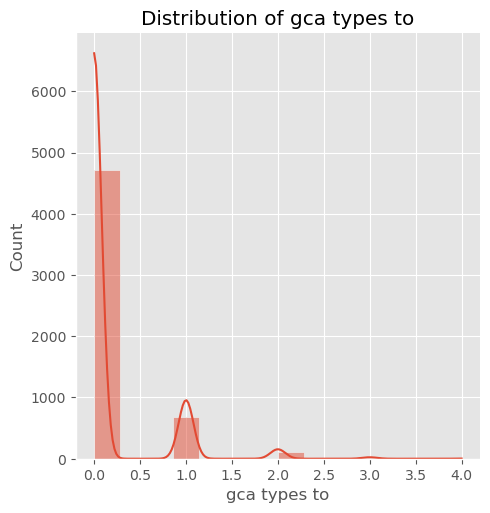

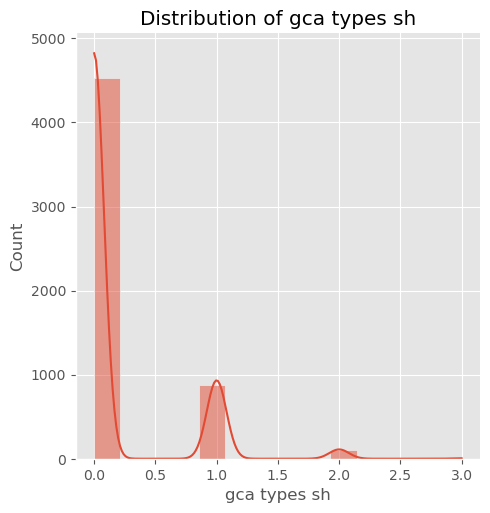

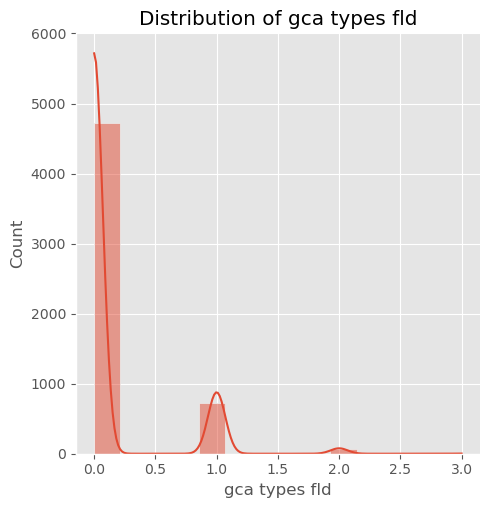

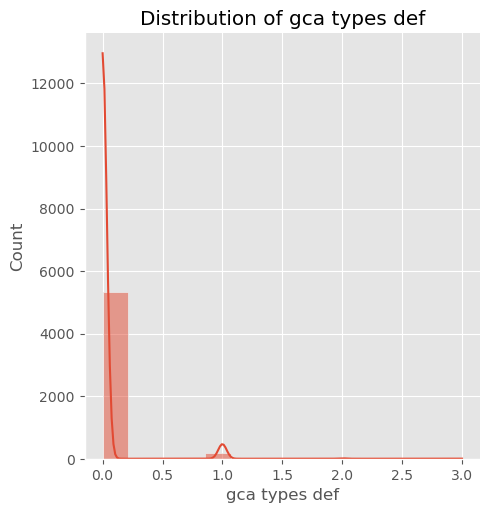

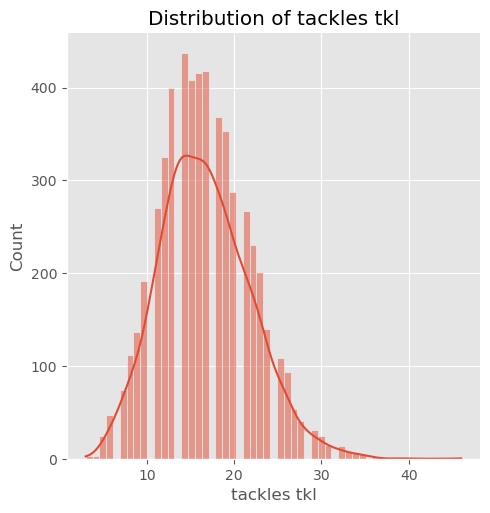

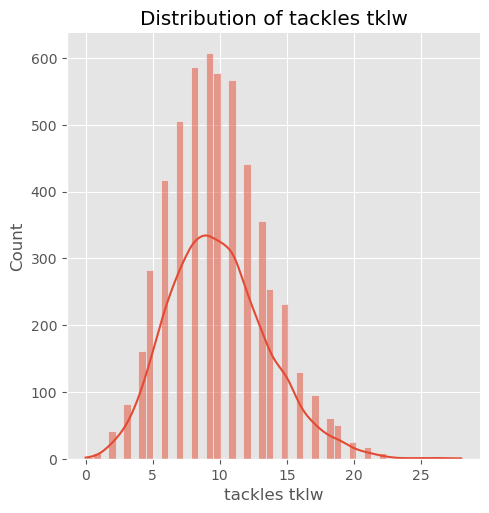

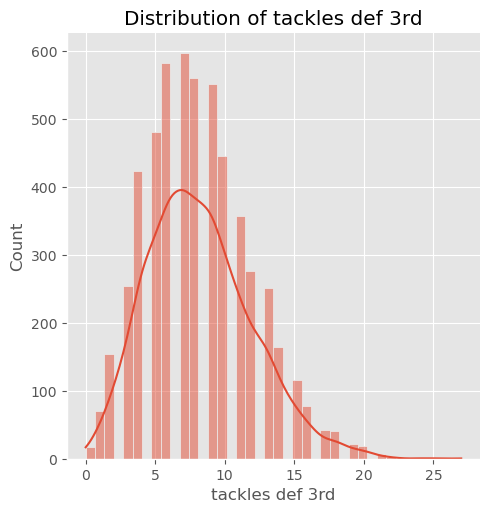

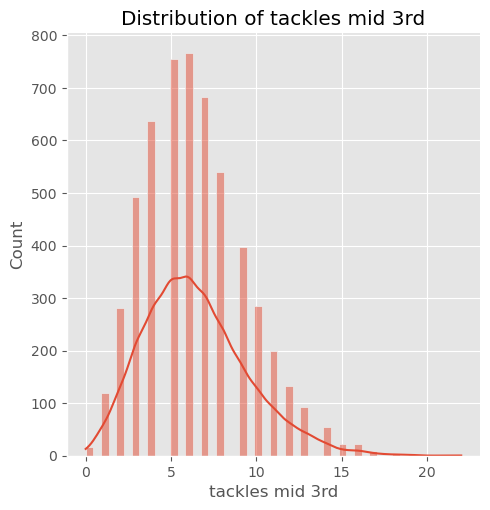

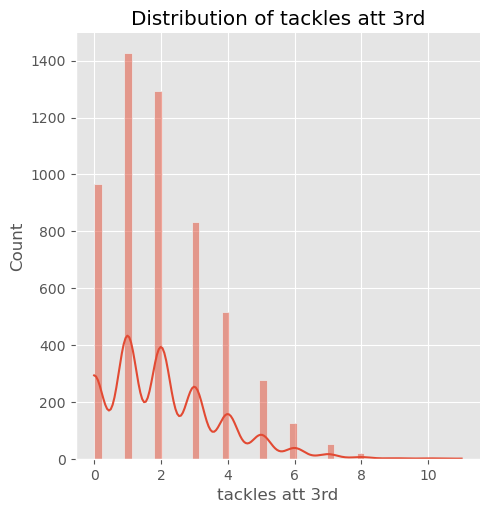

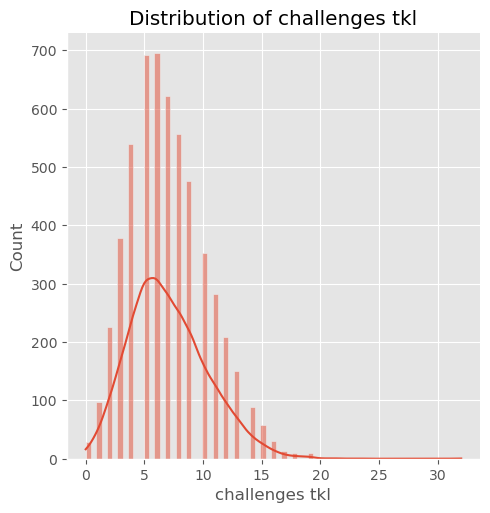

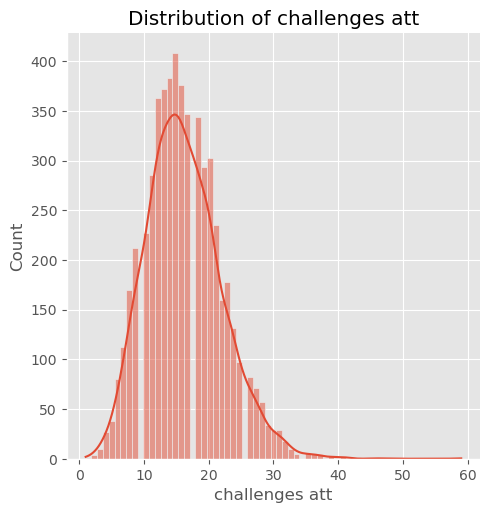

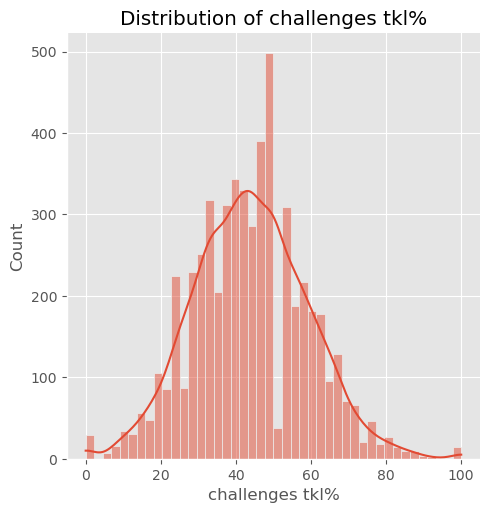

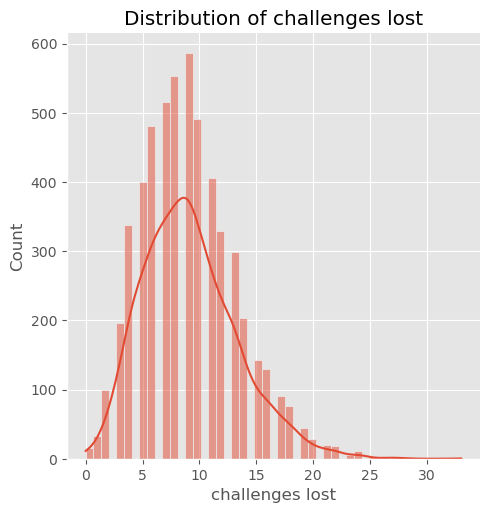

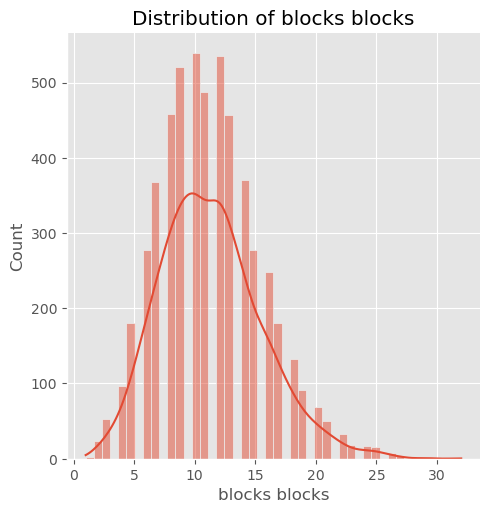

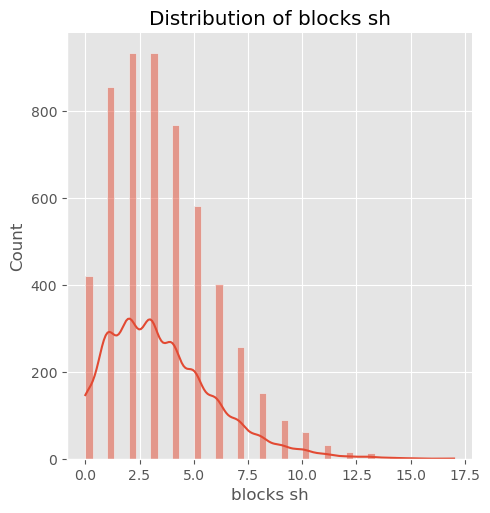

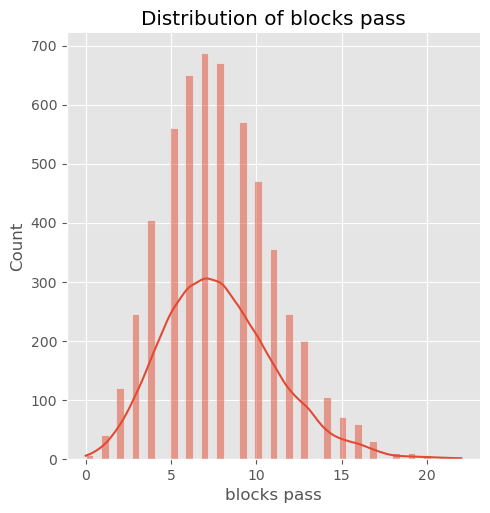

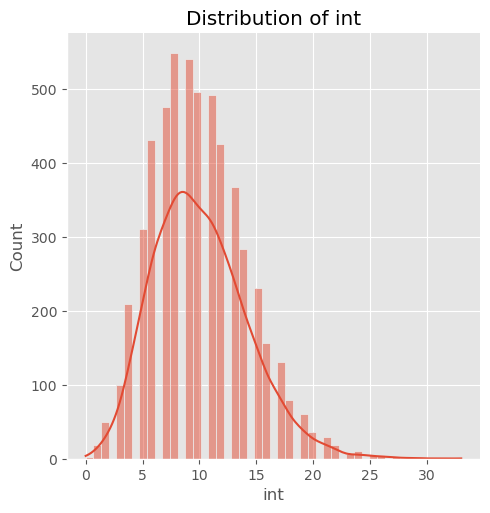

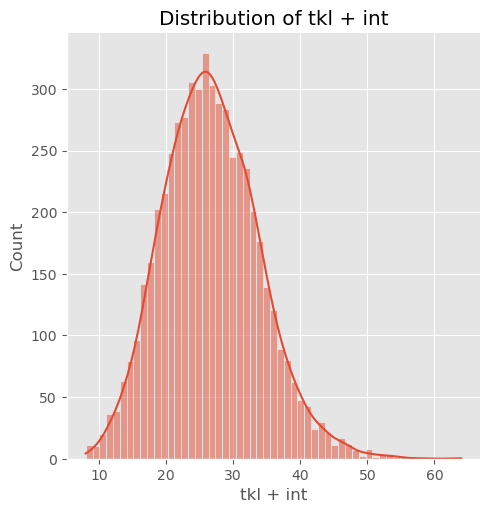

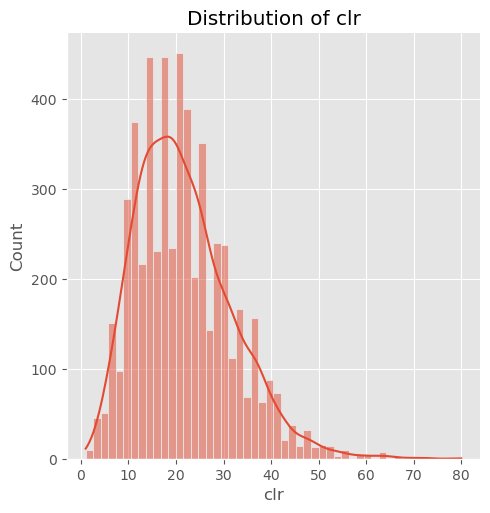

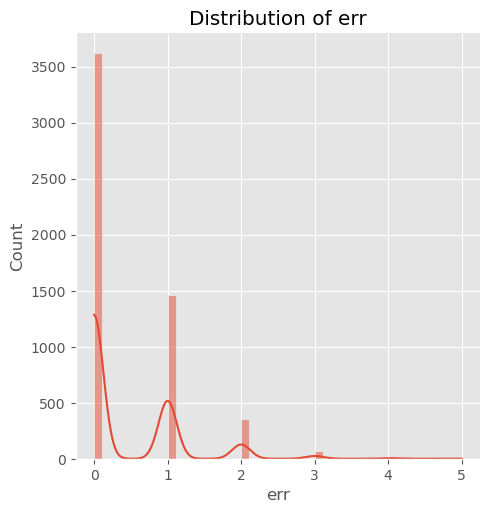

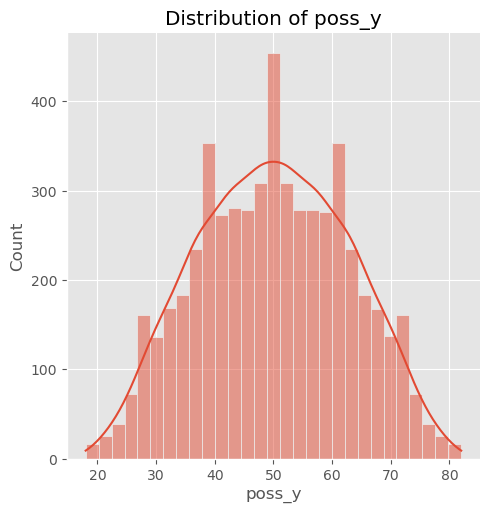

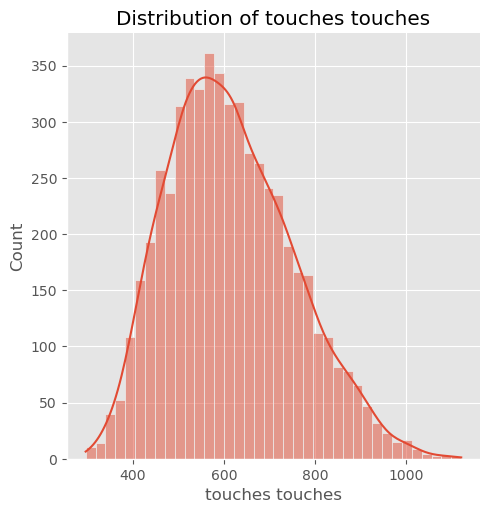

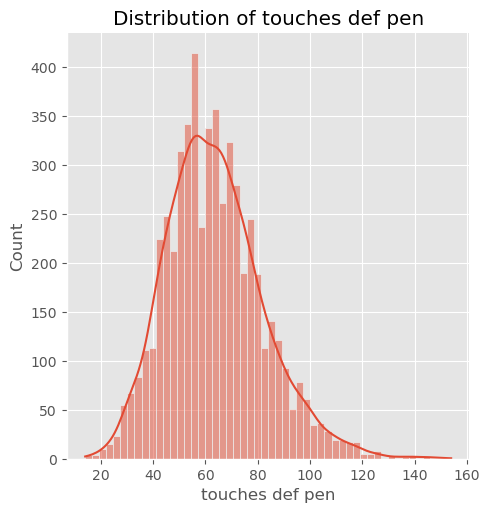

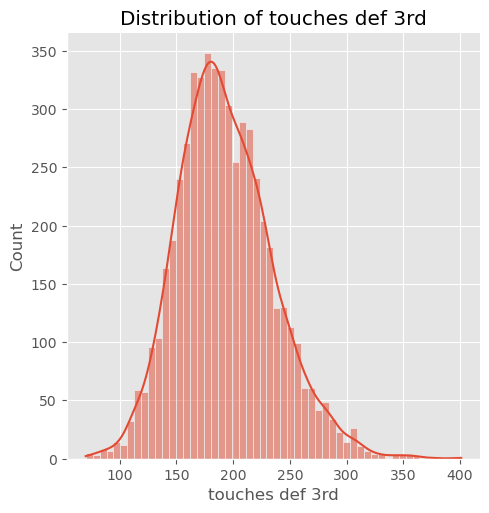

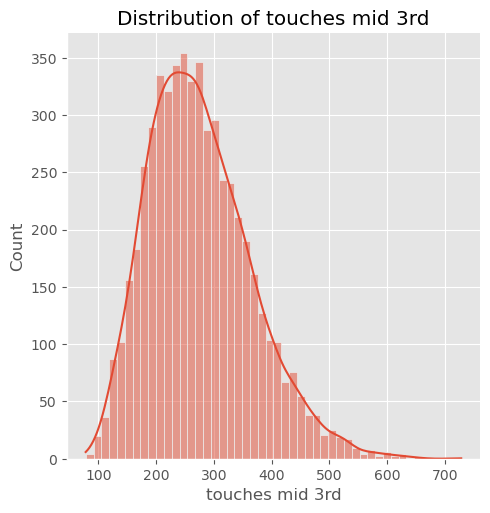

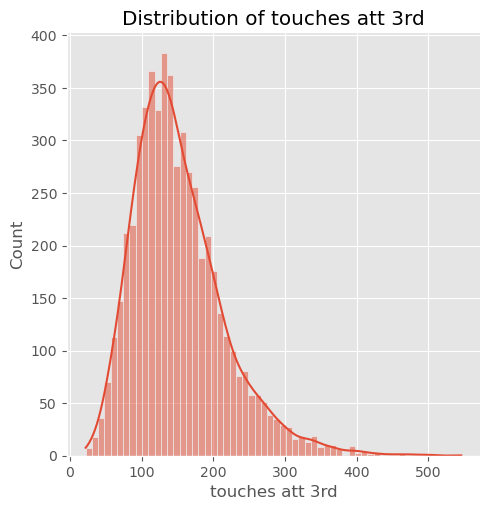

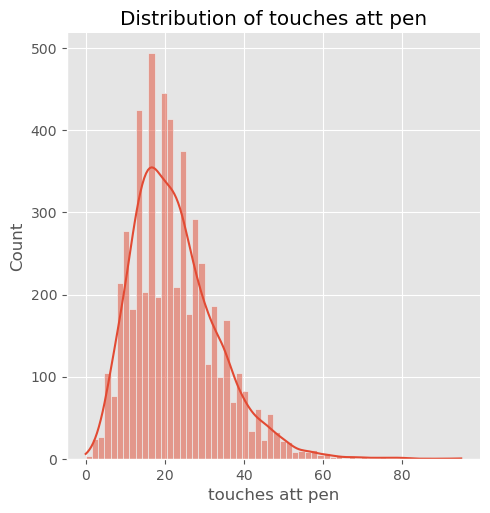

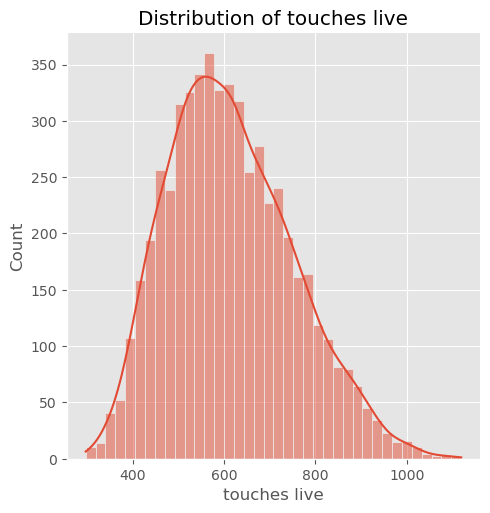

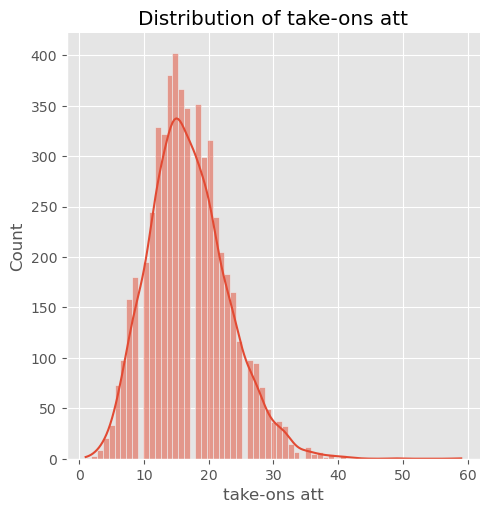

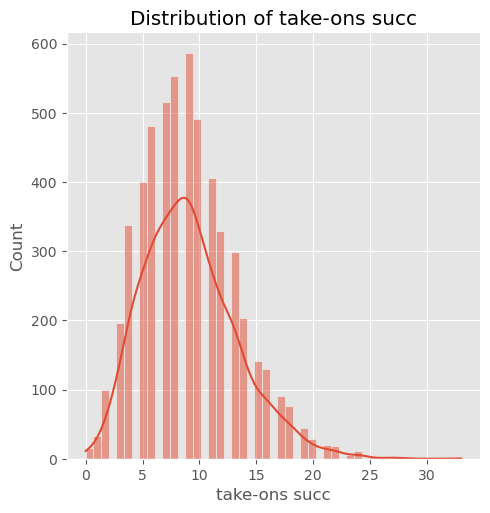

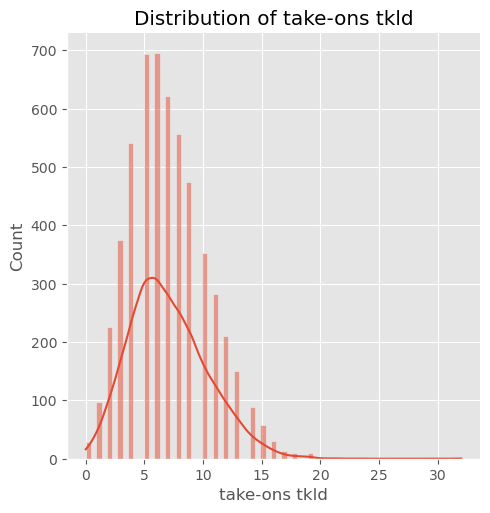

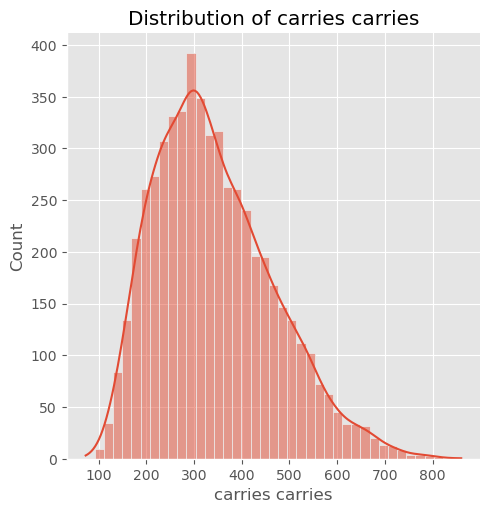

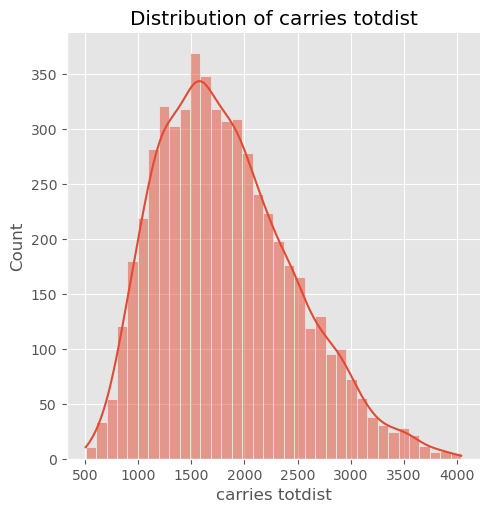

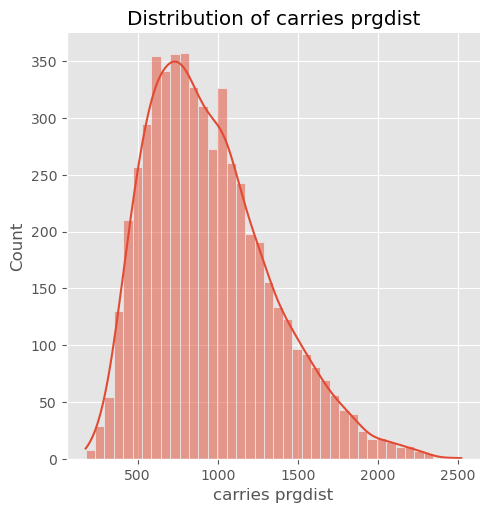

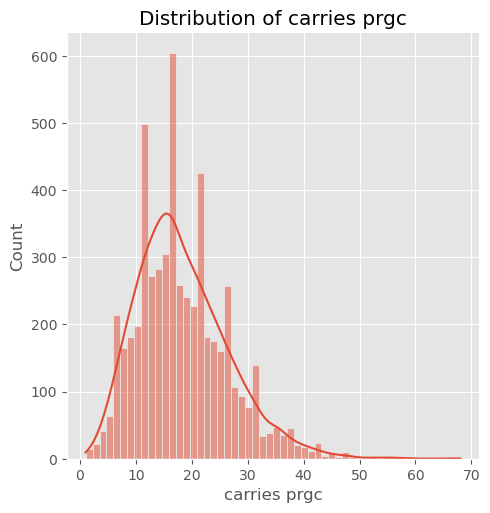

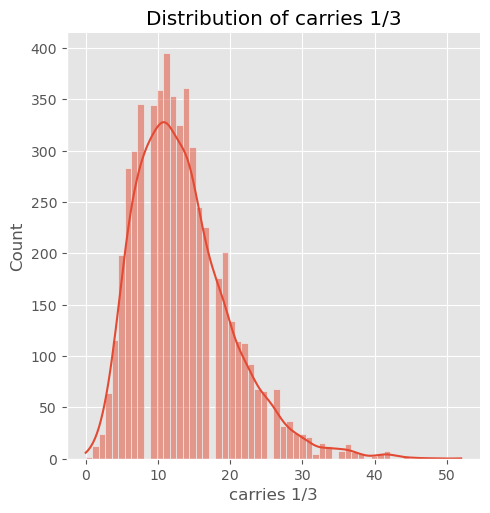

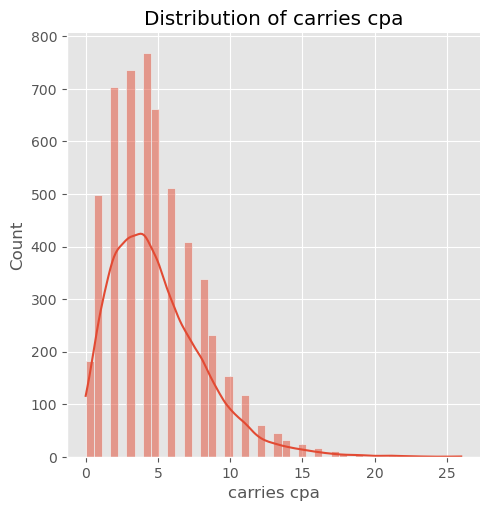

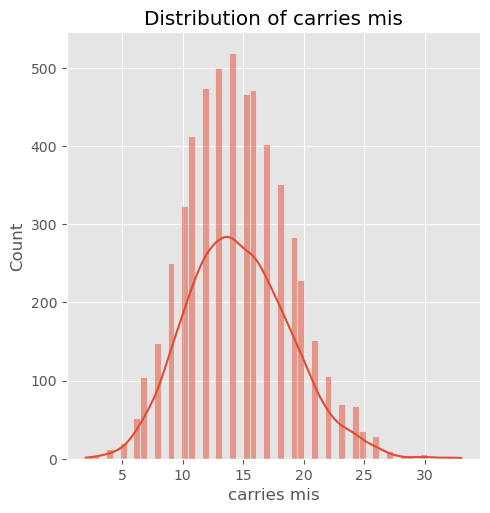

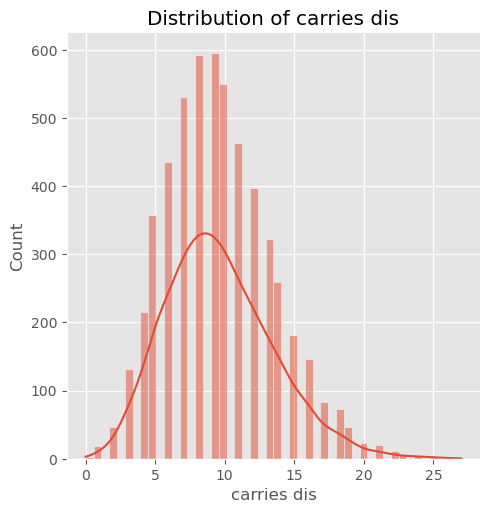

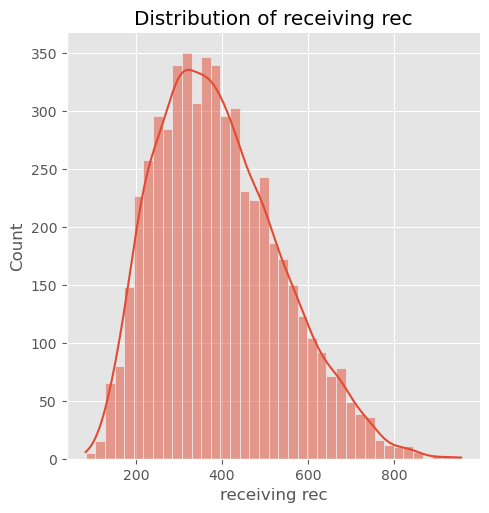

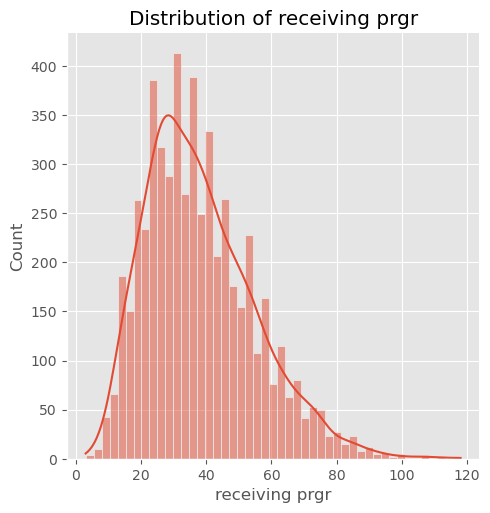

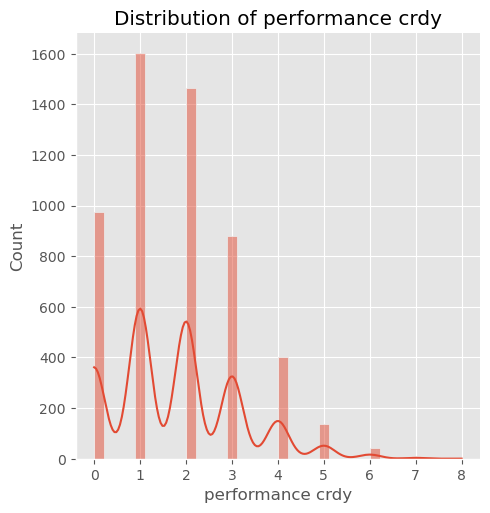

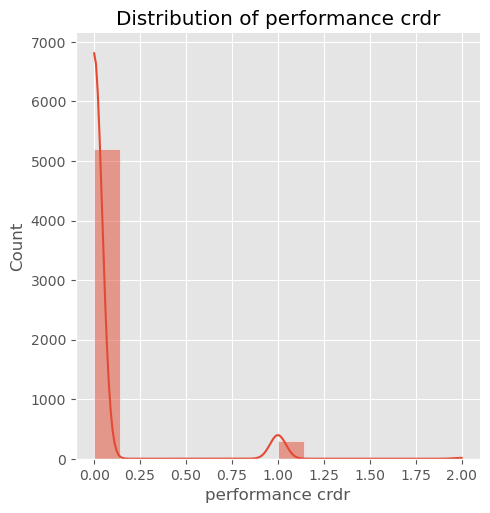

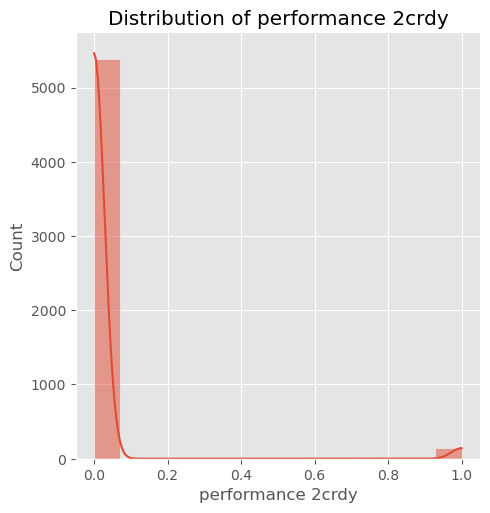

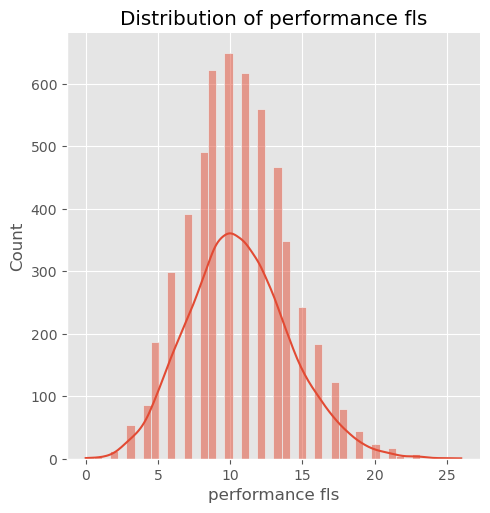

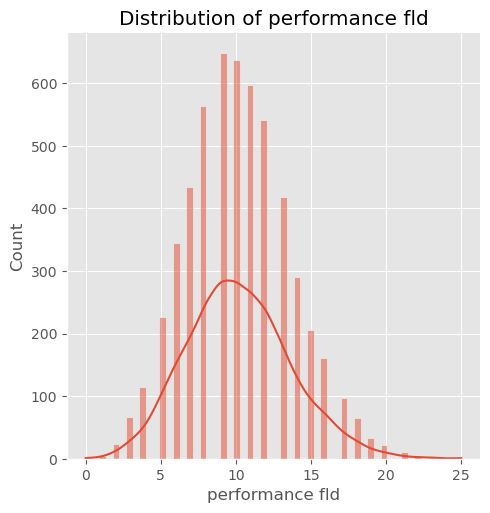

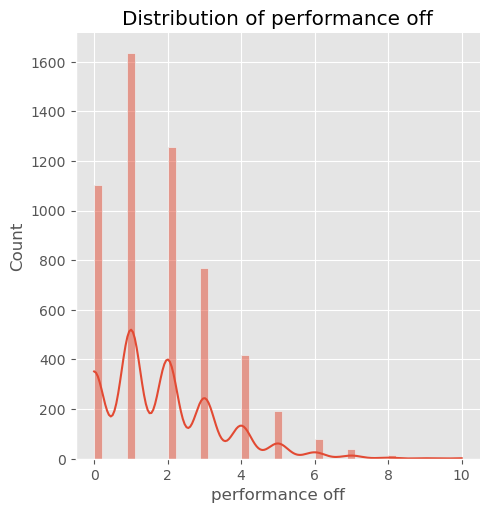

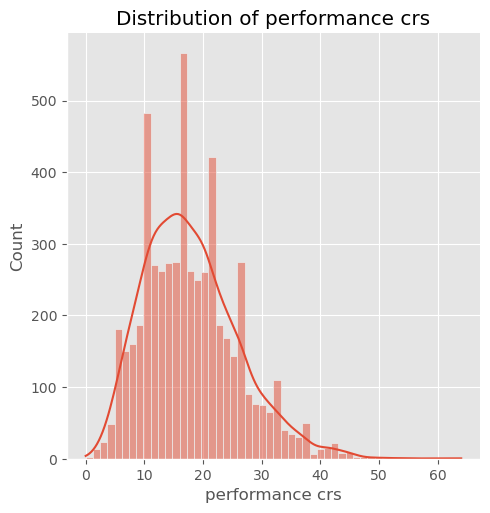

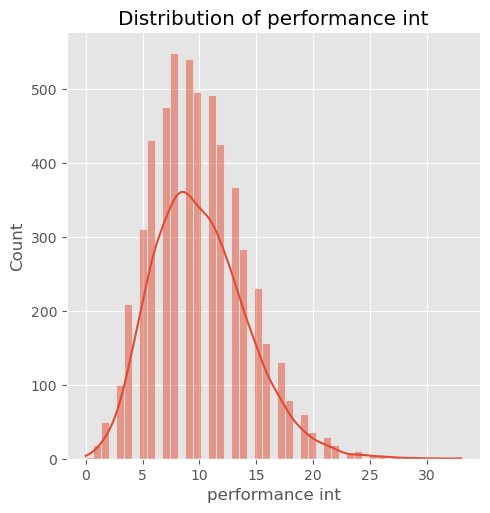

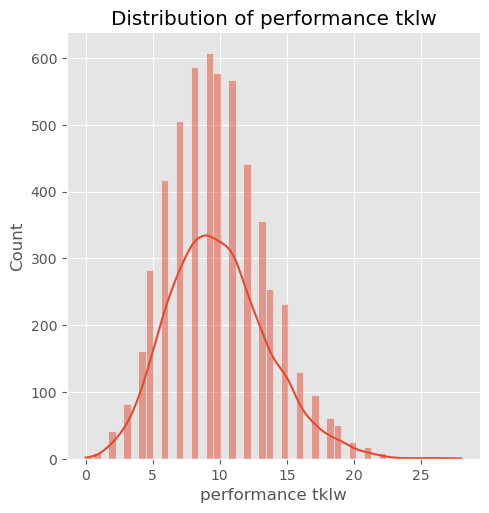

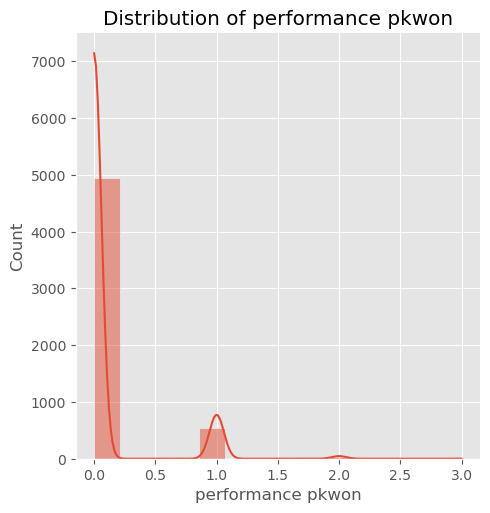

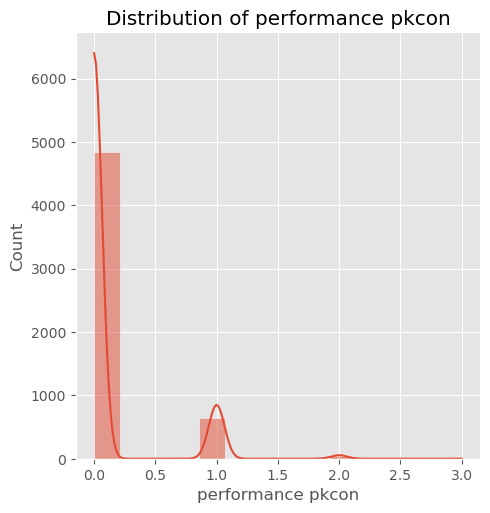

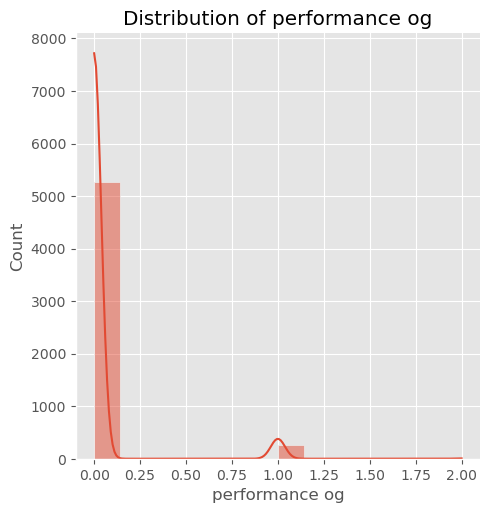

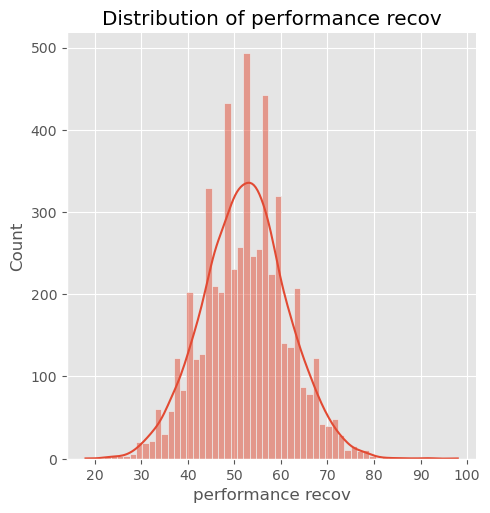

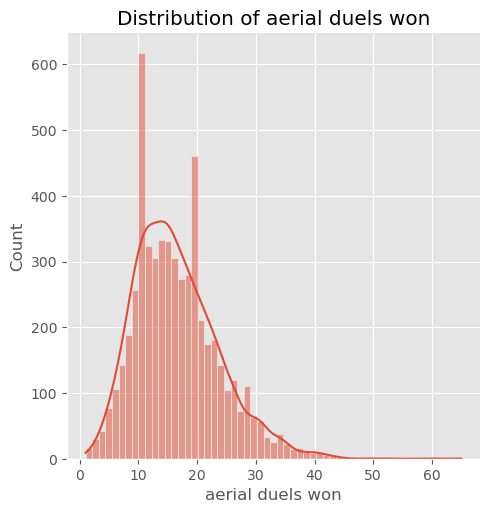

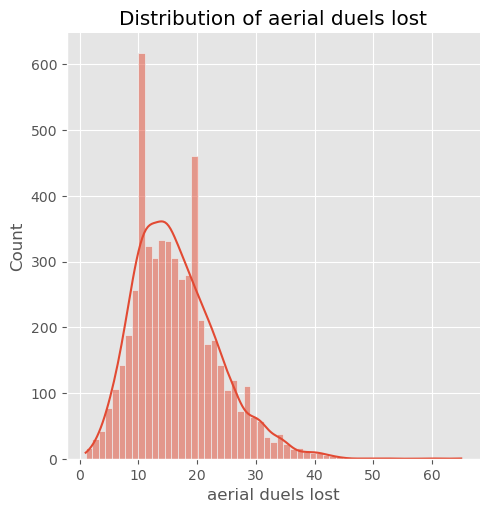

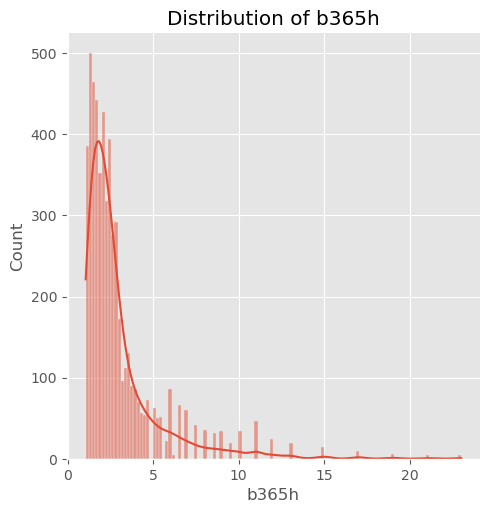

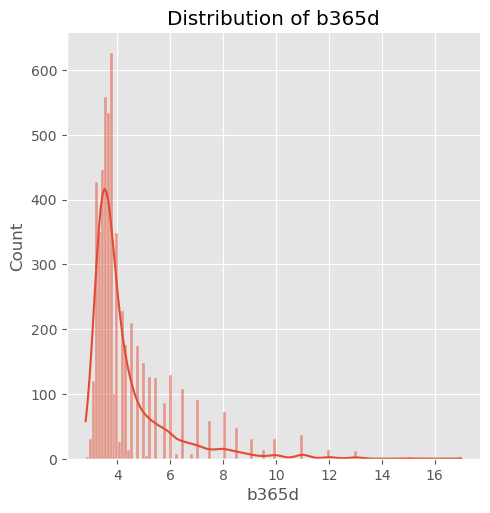

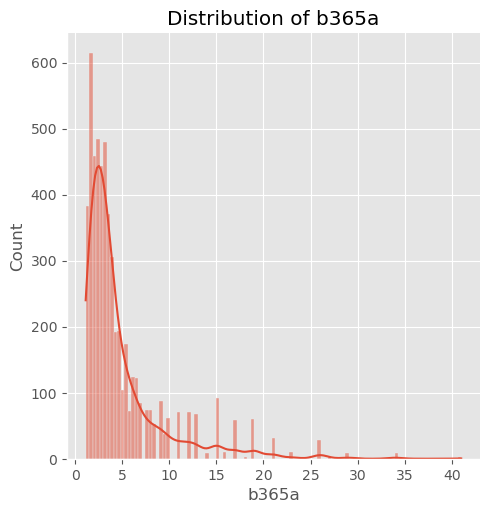

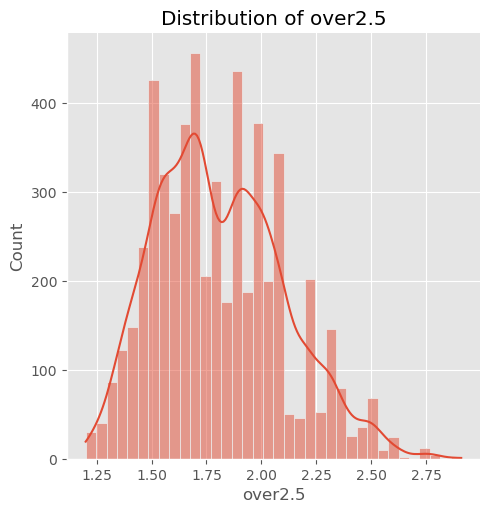

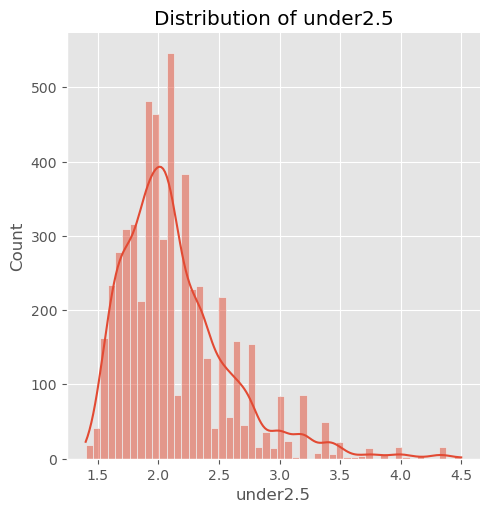

In [60]:
for col in stat_cols:
    sns.displot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Correlation

#### Correlation between Shooting columns and Result

<Axes: >

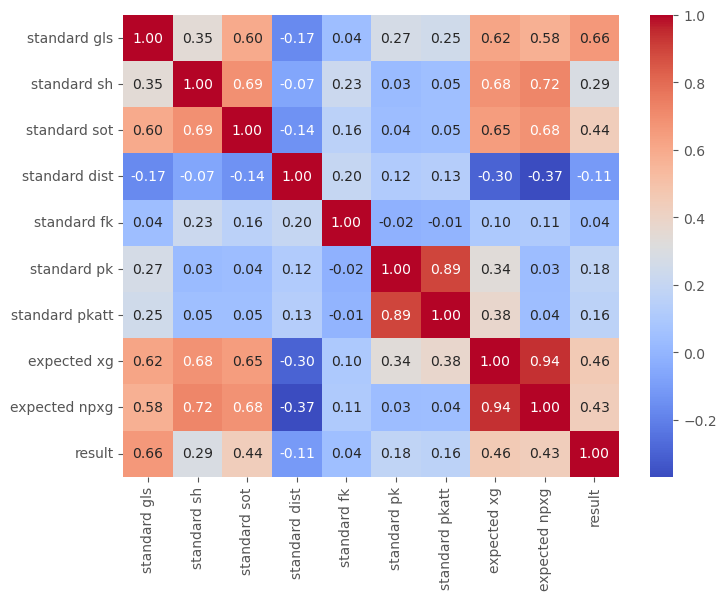

In [80]:
shot_cols = ['standard gls', 'standard sh', 'standard sot', 'standard dist', 'standard fk', 
             'standard pk', 'standard pkatt', 'expected xg', 'expected npxg', 'result']
shot_correlation = df[shot_cols].corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(shot_correlation, annot=True, cmap='coolwarm', ax=ax, fmt='.2f')

#### Correlation between Goalkeeping columns and Result

<Axes: >

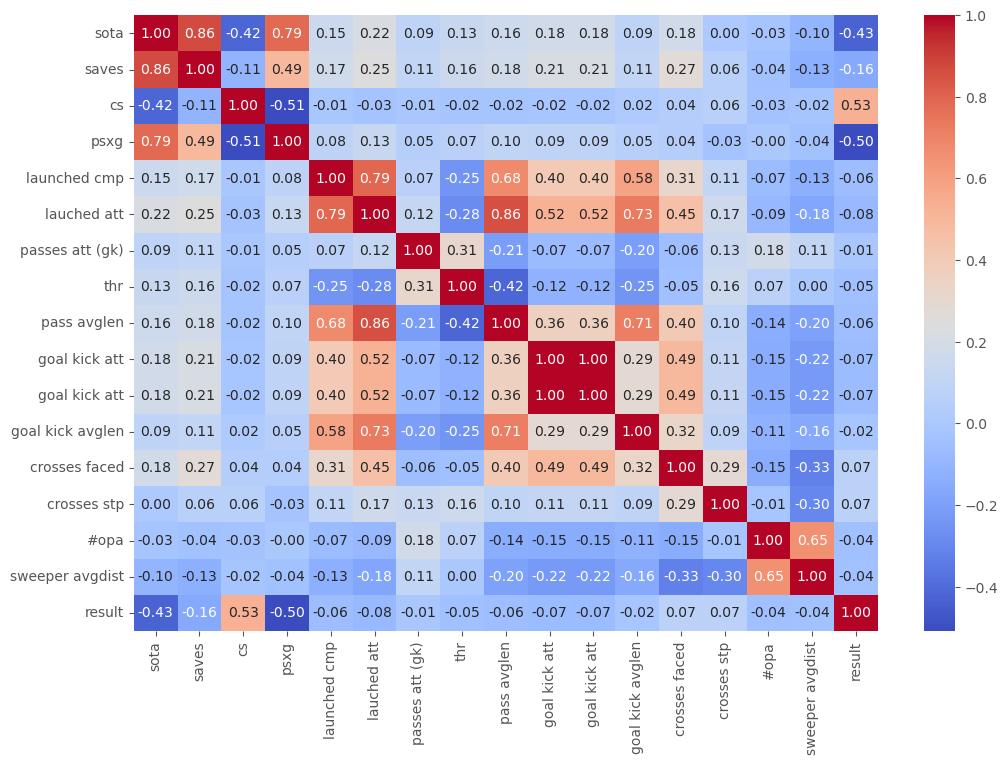

In [79]:
gk_cols = ['sota', 'saves', 'cs', 'psxg', 'launched cmp', 'lauched att', 'passes att (gk)', 'thr', 'pass avglen', 'goal kick att', 
           'goal kick att', 'goal kick avglen', 'crosses faced', 'crosses stp', '#opa', 'sweeper avgdist', 'result']
gk_correlation = df[gk_cols].corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(gk_correlation, annot=True, cmap='coolwarm', ax=ax, fmt='.2f')

#### Correlation between Passing Columns and Result

<Axes: >

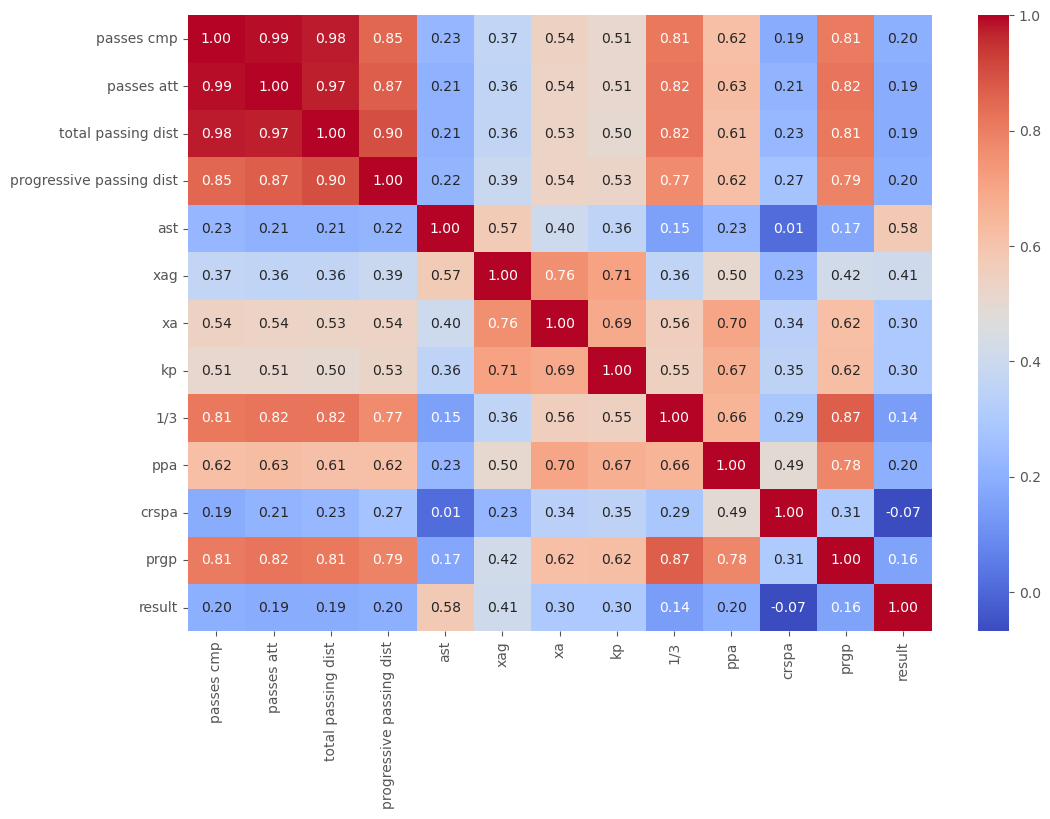

In [82]:
pass_cols = ['passes cmp', 'passes att', 'total passing dist', 'progressive passing dist', 'ast', 'xag', 'xa', 'kp',
             '1/3', 'ppa', 'crspa', 'prgp', 'result']
pass_correlation = df[pass_cols].corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pass_correlation, annot=True, cmap='coolwarm', ax=ax, fmt='.2f')

#### Correlation between Pass Types Columns and Result

<Axes: >

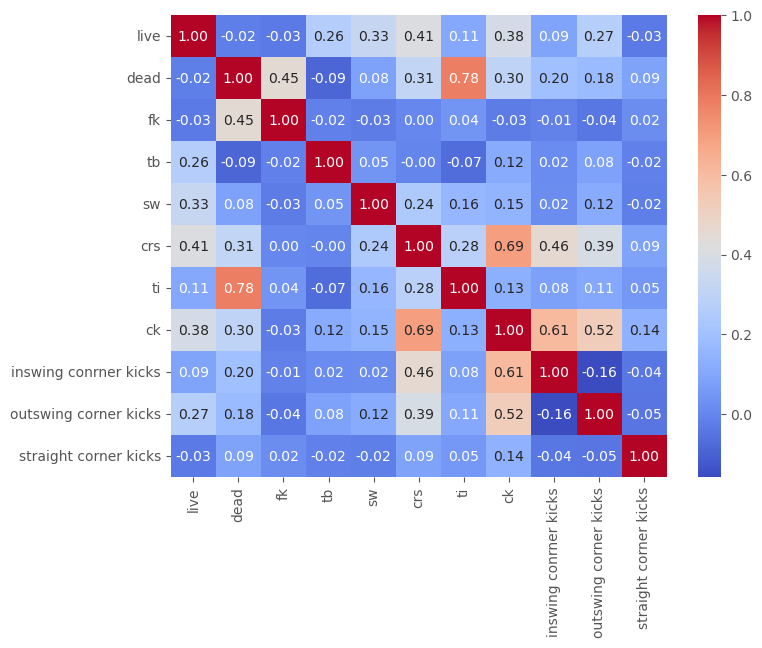

In [84]:
pass_type_cols = ['live', 'dead', 'fk', 'tb', 'sw', 'crs', 'ti', 'ck', 'inswing conrner kicks', 'outswing corner kicks',
                  'straight corner kicks']
pass_type_correlation = df[pass_type_cols].corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pass_type_correlation, annot=True, cmap='coolwarm', ax=ax, fmt='.2f')

#### Correlation between Defensive Columns and Result

<Axes: >

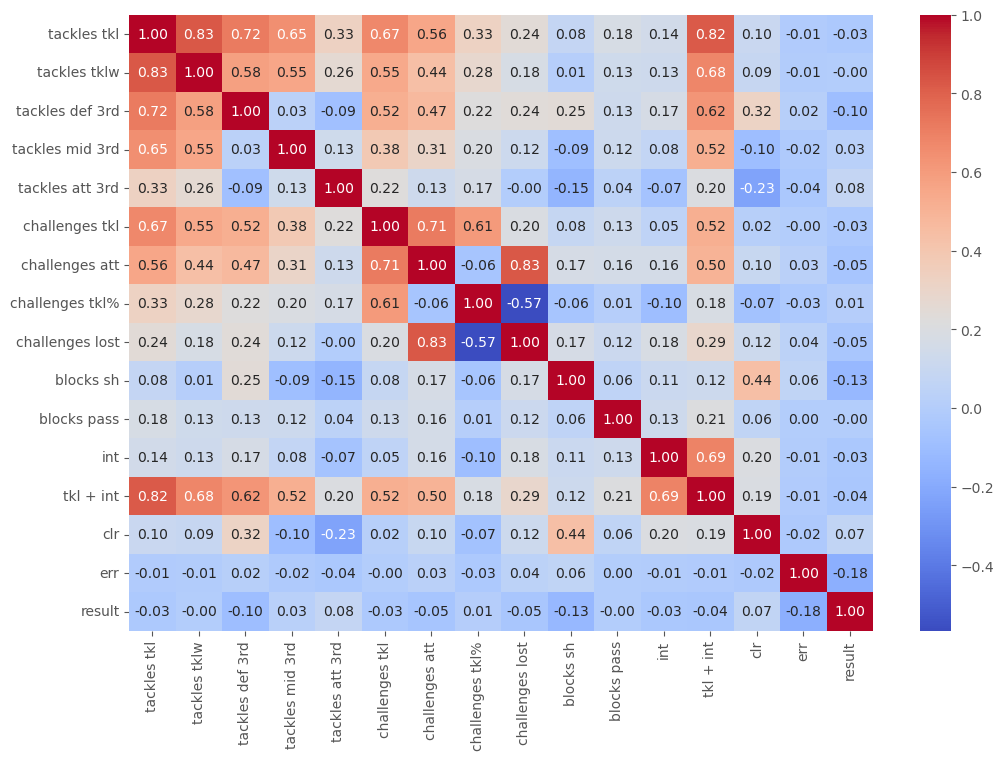

In [85]:
def_cols = ['tackles tkl' , 'tackles tklw', 'tackles def 3rd', 'tackles mid 3rd', 'tackles att 3rd', 'challenges tkl',
            'challenges att', 'challenges tkl%', 'challenges lost', 'blocks sh', 'blocks pass', 
            'int', 'tkl + int', 'clr', 'err', 'result']
def_correlation = df[def_cols].corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(def_correlation, annot=True, cmap='coolwarm', ax=ax, fmt='.2f')

#### Correlation between Possession Columns and Result

<Axes: >

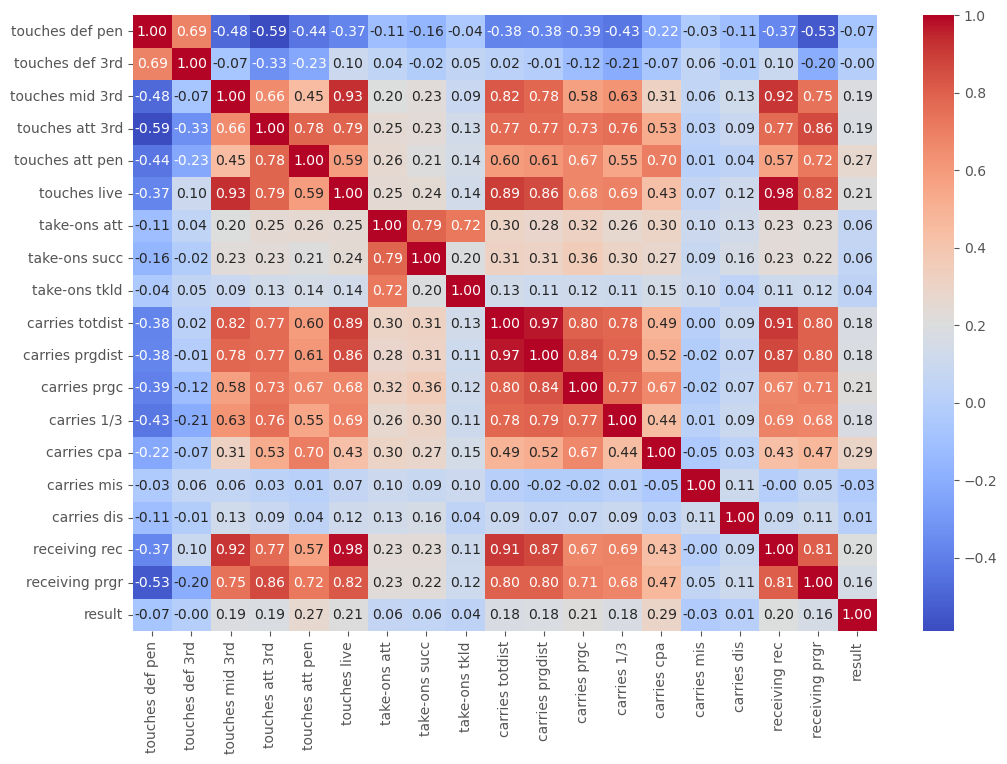

In [86]:
poss_cols = ['touches def pen', 'touches def 3rd', 'touches mid 3rd', 'touches att 3rd', 'touches att pen', 'touches live', 
            'take-ons att', 'take-ons succ', 'take-ons tkld', 'carries totdist', 'carries prgdist', 'carries prgc',
            'carries 1/3', 'carries cpa', 'carries mis', 'carries dis', 'receiving rec', 'receiving prgr', 'result']
poss_correlation = df[poss_cols].corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(poss_correlation, annot=True, cmap='coolwarm', ax=ax, fmt='.2f')

### Average GF and GA

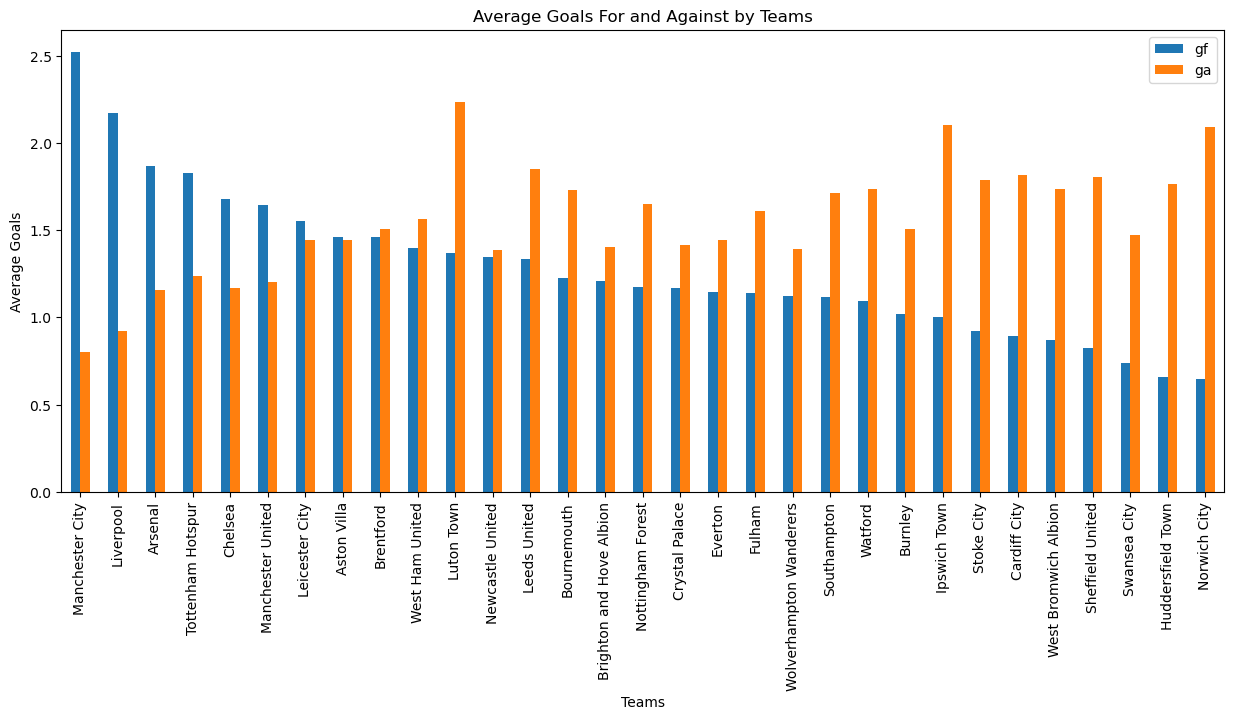

In [4]:
team_stats = df.groupby('team').agg({'gf': 'mean', 'ga': 'mean'}).sort_values('gf', ascending=False)
team_stats.plot(kind='bar', figsize=(15, 6))
plt.title('Average Goals For and Against by Teams')
plt.xlabel('Teams')
plt.ylabel('Average Goals')
plt.show()

### Formation

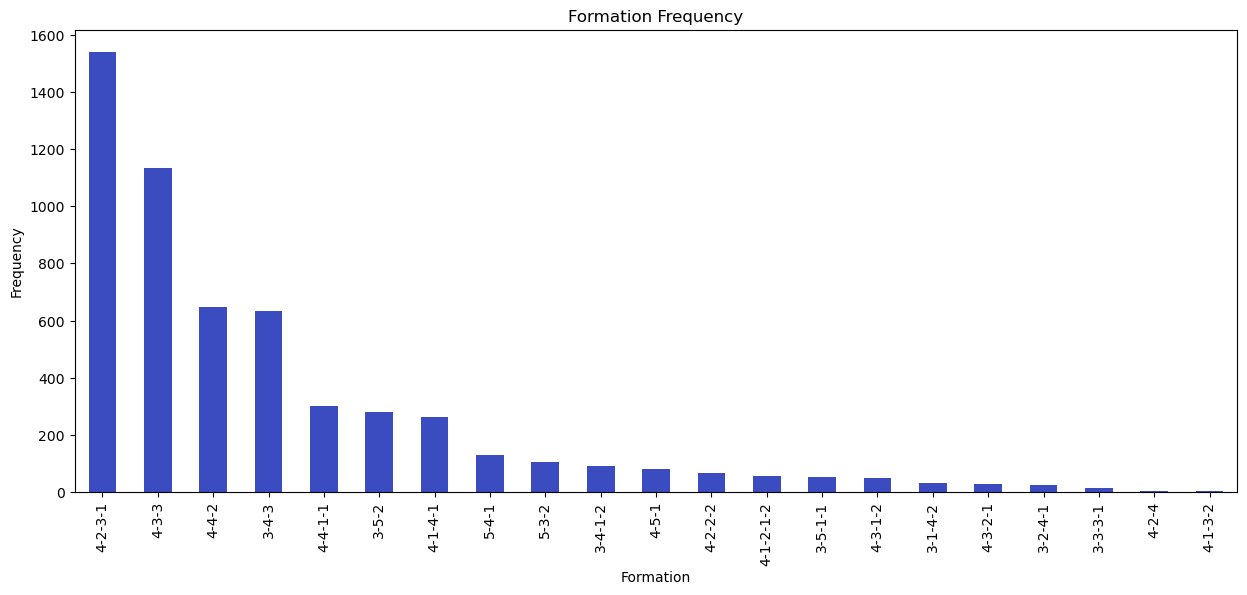

In [5]:
# Visualize formation using bar chart
formation_stats = df['formation'].value_counts()
formation_stats.plot(kind='bar', figsize=(15, 6), colormap='coolwarm')
plt.title('Formation Frequency')
plt.xlabel('Formation')
plt.ylabel('Frequency')
plt.show()

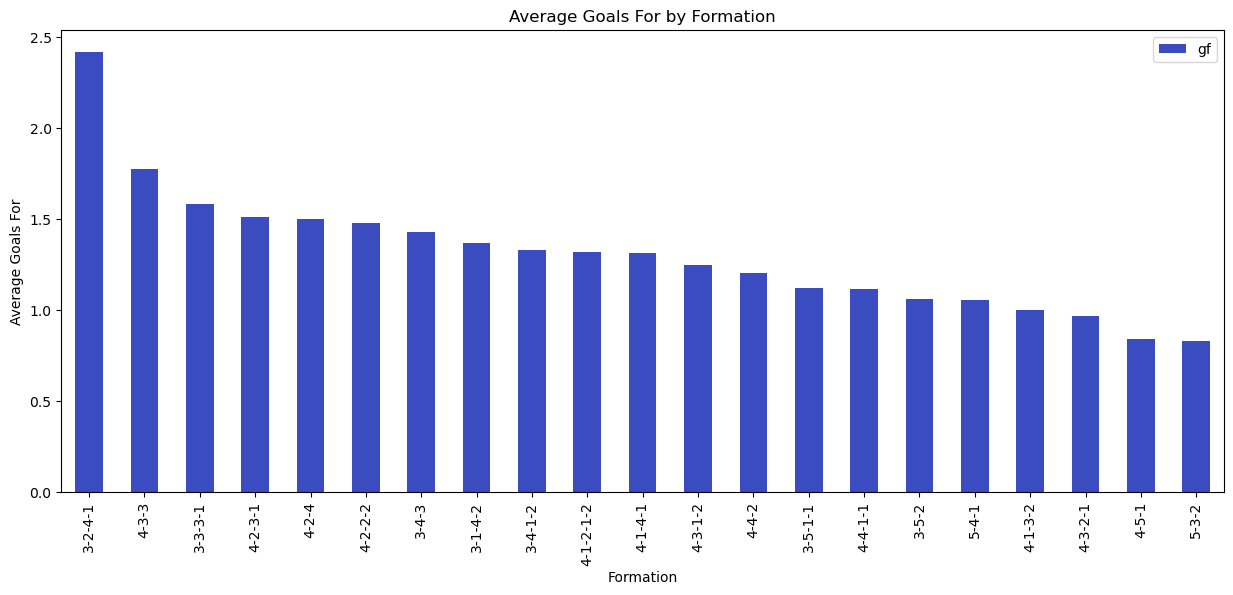

In [ ]:
# Visualize average gf by formation
formation_stats = df.groupby('formation').agg({'gf': 'mean'}).sort_values('gf', ascending=False)
formation_stats.plot(kind='bar', figsize=(15, 6), colormap='coolwarm')
plt.title('Average Goals For by Formation')
plt.xlabel('Formation')
plt.ylabel('Average Goals For')
plt.show()

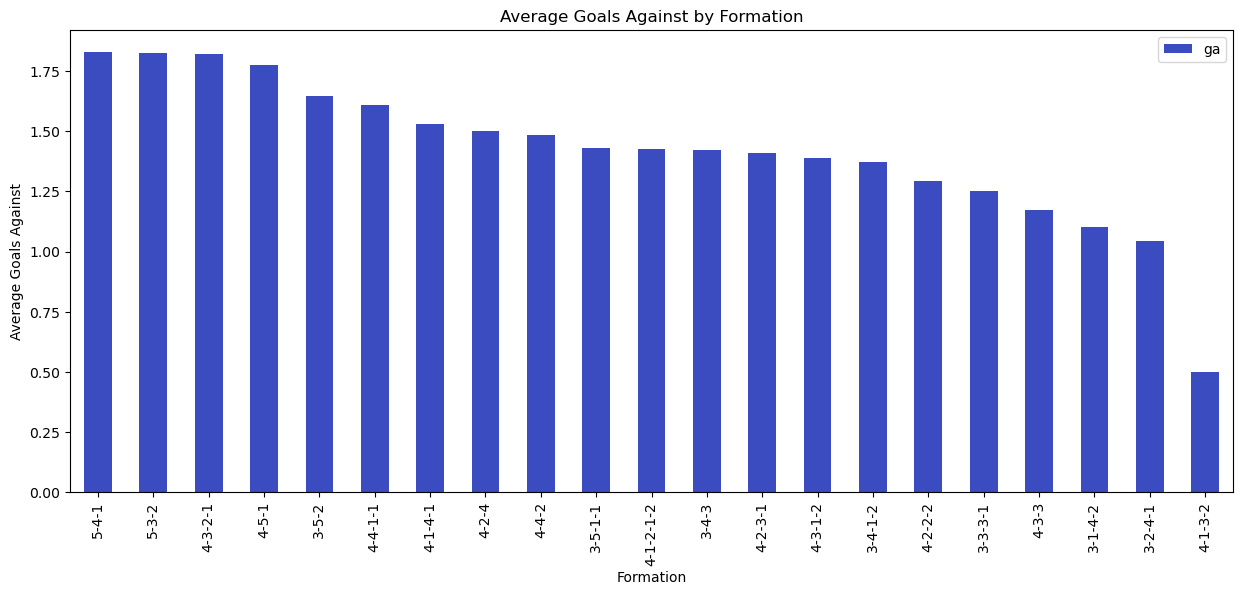

In [ ]:
# Visualize average ga by formation
formation_stats = df.groupby('formation').agg({'ga': 'mean'}).sort_values('ga', ascending=False)
formation_stats.plot(kind='bar', figsize=(15, 6), colormap='coolwarm')
plt.title('Average Goals Against by Formation')
plt.xlabel('Formation')
plt.ylabel('Average Goals Against')
plt.show()

In [ ]:
# Win/Draw/Loss Distribution by Formation
plot_df = df.copy()
plot_df['result'] = plot_df['result'].map({3: 'Win', 1: 'Draw', 0: 'Lost'})
formation_results = plot_df.groupby('formation')['result'].value_counts().unstack()

fig = px.bar(formation_results, 
             title='Win/Draw/Loss Distribution by Formation',
             barmode='stack')
fig.show()

### Relationship between GF and Shot Distance

Text(0.5, 1.0, 'Distribution of GF by Average Shot Distance')

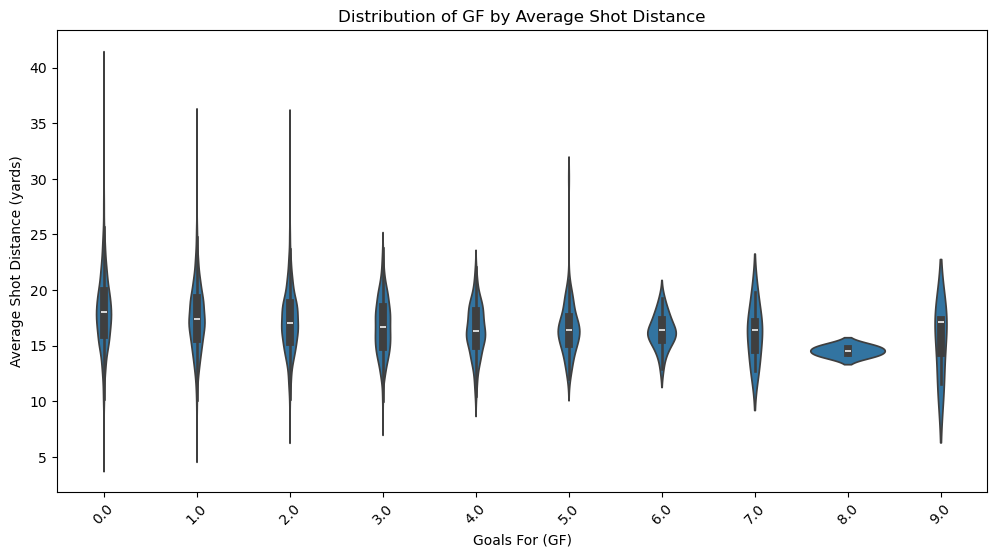

In [13]:
# Violin plot với seaborn
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=df, x='gf', y='standard dist')
plt.xticks(rotation=45)
plt.ylabel('Average Shot Distance (yards)')
plt.xlabel('Goals For (GF)')
plt.title('Distribution of GF by Average Shot Distance')

### Playing styles

In [17]:
# arrange team on the order of points over all seasons 
team_order = df.groupby('team')['points'].sum().sort_values(ascending=False).index
team_order

Index(['Manchester City', 'Liverpool', 'Arsenal', 'Manchester United',
       'Tottenham Hotspur', 'Chelsea', 'West Ham United',
       'Brighton and Hove Albion', 'Newcastle United', 'Everton',
       'Leicester City', 'Crystal Palace', 'Wolverhampton Wanderers',
       'Aston Villa', 'Southampton', 'Burnley', 'Bournemouth', 'Watford',
       'Fulham', 'Brentford', 'Leeds United', 'Sheffield United',
       'Nottingham Forest', 'Huddersfield Town', 'West Bromwich Albion',
       'Norwich City', 'Stoke City', 'Swansea City', 'Cardiff City',
       'Luton Town', 'Ipswich Town'],
      dtype='object', name='team')

In [18]:
top_teams = team_order[:5]
middle_teams = team_order[10:15]
bottom_teams = team_order[-5:]
top_teams, middle_teams, bottom_teams

(Index(['Manchester City', 'Liverpool', 'Arsenal', 'Manchester United',
        'Tottenham Hotspur'],
       dtype='object', name='team'),
 Index(['Leicester City', 'Crystal Palace', 'Wolverhampton Wanderers',
        'Aston Villa', 'Southampton'],
       dtype='object', name='team'),
 Index(['Stoke City', 'Swansea City', 'Cardiff City', 'Luton Town',
        'Ipswich Town'],
       dtype='object', name='team'))

In [14]:
def normalize_stats(df, categories):
    """
    Normalize statistics using z-score and clip to reasonable bounds
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing team statistics
    categories (list): List of categories to normalize
    
    Returns:
    pandas.DataFrame: Normalized DataFrame
    """
    normalized_df = df[categories].copy()
    
    for col in categories[1:]:
        # Calculate z-scores
        mean = normalized_df[col].mean()
        std = normalized_df[col].std()
        z_scores = (normalized_df[col] - mean) / std
        
        # Convert to 0-1 scale with sigmoid transformation
        normalized_df[col] = 1 / (1 + np.exp(-z_scores))
        
    return normalized_df

In [15]:
categories = ['team', 'poss_x', 'passes cmp', 'passes att', 'ppa', 'touches att pen', 'crs', 
              'xg', 'standard sot', 'xga', 'tackles tkl', 'challenges att']
plot_df = df[categories]
plot_df['passes cmp rate'] = plot_df['passes cmp'] / plot_df['passes att']
plot_df.drop(columns=['passes cmp', 'passes att'], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_26032\1446539321.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\admin\AppData\Local\Temp\ipykernel_26032\1446539321.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
plot_df = normalize_stats(plot_df, plot_df.columns)

In [19]:
top_teams_df = plot_df[plot_df['team'].isin(top_teams)]
top_teams_df = top_teams_df.groupby('team').mean()

mid_teams_df = plot_df[plot_df['team'].isin(middle_teams)]
mid_teams_df = mid_teams_df.groupby('team').mean()

bot_teams_df = plot_df[plot_df['team'].isin(bottom_teams)]
bot_teams_df = bot_teams_df.groupby('team').mean()

In [24]:
plot_df.columns

Index(['team', 'poss_x', 'ppa', 'touches att pen', 'crs', 'xg', 'standard sot',
       'xga', 'tackles tkl', 'challenges att', 'passes cmp rate'],
      dtype='object')

In [25]:
categories_explained = ['Possession', 'Passes into Penalty Area', 'Touches in Penalty Area', 'Crosses', 'xG', 'Average Shot Distance', 
                        'xGA', 'Tackles', 'Dribbles Challenged', 'Pass Completion Rate']

In [26]:
fig = go.Figure()

for team, values in top_teams_df.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories_explained,
        fill='toself',
        name=team
    ))
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  
        )
    ),
    title='Comparison of Top 5 Teams with highest points in all seasons',
    showlegend=True
)
fig.show()

In [27]:
fig = go.Figure()

for team, values in mid_teams_df.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories_explained,
        fill='toself',
        name=team
    ))
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  
        )
    ),
    title='Comparison of 5 Middle Teams',
    showlegend=True
)
fig.show()

In [28]:
fig = go.Figure()

for team, values in bot_teams_df.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories_explained,
        fill='toself',
        name=team
    ))
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  
        )
    ),
    title='Comparison of top 5 teams with lowest points',
    showlegend=True
)
fig.show()

### Expected Goals vs Actual Goals

In [33]:
top_teams_df = df[df['team'].isin(top_teams)]
fig = px.scatter(top_teams_df, x='xg', y='gf',
                 trendline="ols",  # thêm đường trend
                 hover_data=['team', 'opponent', 'date'],
                 title='Expected Goals vs Actual Goals for Top 5 Teams with highest points',
                 labels={'xg': 'Expected Goals (xG)', 
                        'gf': 'Goals Scored'},
                 trendline_color_override='gold',
                 trendline_scope='overall')

fig.add_trace(go.Scatter(x=[0, top_teams_df['xg'].max()], 
                        y=[0, top_teams_df['xg'].max()],
                        mode='lines', 
                        name='Perfect Prediction',
                        line=dict(dash='dash')))

In [34]:
bot_teams_df = df[df['team'].isin(bottom_teams)]
fig = px.scatter(bot_teams_df, x='xg', y='gf',
                 trendline="ols",  # thêm đường trend
                 hover_data=['team', 'opponent', 'date'],
                 title='Expected Goals vs Actual Goals for top 5 teams with lowest points',
                 labels={'xg': 'Expected Goals (xG)', 
                        'gf': 'Goals Scored'},
                 trendline_color_override='gold',
                 trendline_scope='overall')

fig.add_trace(go.Scatter(x=[0, bot_teams_df['xg'].max()], 
                        y=[0, bot_teams_df['xg'].max()],
                        mode='lines', 
                        name='Perfect Prediction',
                        line=dict(dash='dash')))

### Possession

In [38]:
# Size của bubble là số lần qua người thành công
fig = px.scatter(df[df['team'].isin(top_teams)], 
                 x='take-ons att',
                 y='carries totdist',
                 size='take-ons succ',
                 color='team',
                 hover_data=['opponent', 'date'],
                 title='Dribbling and Ball-Carrying Effectiveness of Top 5 Teams with highest points',)

fig.update_xaxes(title_text='Dribbles Attempted')
fig.update_yaxes(title_text='Total Distance Carried with Ball (yards)')
fig.show()

In [ ]:
fig = px.scatter(df[df['team'].isin(bottom_teams)], 
                 x='take-ons att',
                 y='carries totdist',
                 size='take-ons succ',
                 color='team',
                 hover_data=['opponent', 'date'],
                 title='Dribbling and Ball-Carrying Effectiveness of Top 5 Teams with lowest points',)

fig.update_xaxes(title_text='Dribbles Attempted')
fig.update_yaxes(title_text='Total Distance Carried with Ball (yards)')
fig.show()

### Touches across the field

In [39]:
touch_matrix = pd.DataFrame({
    'Defensive Third': [df['touches def 3rd'].mean()],
    'Middle Third': [df['touches mid 3rd'].mean()],
    'Attacking Third': [df['touches att 3rd'].mean()]
})

# Plotly heatmap
fig = px.imshow(touch_matrix,
                labels=dict(x="Field Zone", y="Team", color="Number of Touches"),
                title="Touch Distribution Across the Field")
fig.show()